# History of Video Games in the Last 40 Years

The video games market in 2020 grew to 140 billion dollars worth as reported by [SuperData](https://www.superdataresearch.com/reports/p/2020-year-in-review) exceeding the market [capitalization of the film industry](https://www.forbes.com/sites/rosaescandon/2020/03/12/the-film-industry-made-a-record-breaking-100-billion-last-year/?sh=367773fe34cd) by more than 40 billion dollars. 

In the last 20 years (2000-2020) the market has grown from 60 billion to almost 140 billion dollars and the industry has become more than a niche market for few customers: nowadays, it targets all ages and genders. And it's no surprise that *Grand Theft Auto V* in 2013, [reached 1 billion dollars in sales](https://www.theverge.com/2013/9/20/4752458/grand-theft-auto-v-earns-one-billion-in-three-days) in just three days making it one of the fastest-selling entertainment product in history.

In this project, we are going to analyze a [video games dataset](https://www.kaggle.com/gregorut/videogamesales) which contains a list of video games collected from [vgchartz.com](https://www.vgchartz.com/) in 2016. This dataset contains information about platforms, release years, main genres, publishers and sales in four markets (North America, Europe, Japan and other countries). We will also use a dataset created by web scraping Wikipedia to analyze game franchises.

## What Are We Going to Analyze?

In this project, we will provide a thorough analysis of the variables used by VGChartz to split the games into different categories. We will give the readers a feeling of the historical and current development of the video game market by concentrating on:

1. Sales
2. Platforms 
3. Genres 
4. Publishers 
5. Franchises


## Project Summary

The most important insights of the analysis are:

1. The best year in the video game industry is 2008 with 700 million sales worldwide
2. The best-selling game in the world is *Wii Sports*
3. The most popular gaming platform of all times is PlayStation 2, owned by Sony
4. The most popular genre worldwide is Action
5. The most successful publisher is Nintendo, based in Japan, which accumulated almost 2 billion sales in 30 years of history
6. The most successful video game franchise is Wii, owned by Nintendo

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

# Show plots inline
%matplotlib inline

# Use R ggplot plotstyle
plt.style.use("ggplot")

## Data Cleaning

Before we start analyzing the dataset we have to ensure that the data are correct, hence we have to check for:

1. Inconsistent data
2. Missing values
3. Duplicates
4. Typos in categorical variables

Let's have a quick look at the data to understand its structure.

In [2]:
# Read data and show first five rows
path = "./data/vgsales.csv"
data = pd.read_csv(path)
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


The last time the dataset was updated on 26/10/2016 so, for more precise analysis, it is better to remove the data after 2016 because the data are inconsistent (or incomplete), since the games that were planned to be released in 2017 could not accumulate the sales. They are "only" 4 games so we are not losing a lot of information.

In [3]:
d_2016 = data[data["Year"] > 2016]
print(f"There are {d_2016.shape[0]} games planned to be released in 2017 and after.")

There are 4 games planned to be released in 2017 and after.


In [4]:
drop_row_index = data[data["Year"] > 2016].index
data = data.drop(drop_row_index)

Now, let's check for the missing values.

In [5]:
## Style to use for plots

# Font for titles
font_title = {"size": 22, "weight": "bold", "alpha": 0.75}

# Font for subtitles
font_subtitle = {"size": 16, "alpha": 0.85}

# Function to change plot style
def plot_style():

    # Remove ticks and set label size
    plt.tick_params(axis="both", labelsize=14, bottom=False, left=False)

    # Set x axis label size
    plt.xlabel(xlabel=plt.gca().get_xlabel(), size=18)

    plt.ylabel(ylabel=plt.gca().get_ylabel(), size=18)

Text(-1.9, 300, 'Missing Values')

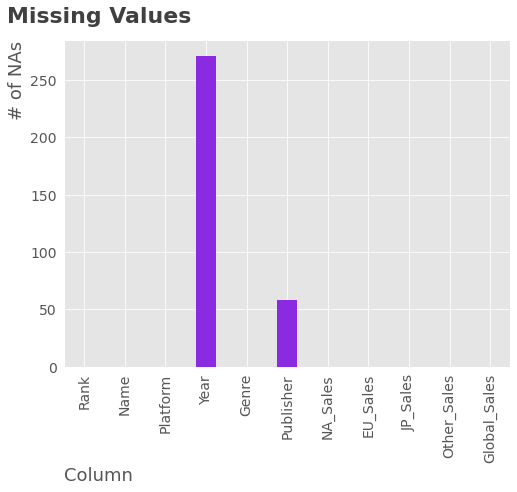

In [6]:
plt.figure(figsize=(8, 6))
data.isna().sum().plot.bar(color="blueviolet")

# Set plot style
plot_style()

plt.xlabel("Column", ha="left", x=0)
plt.ylabel("# of NAs", ha="right", y=1)

# Title
plt.text(s="Missing Values", x=-1.9, y=300, fontdict=font_title)

We do not have a lot of missing values, which means we are not losing much information, thus we can drop them.

In [7]:
g = data.dropna()

The third and last check is for any duplicated values...

In [8]:
g[["Name", "Platform"]].duplicated().sum()

3

In [9]:
g[g[["Name", "Platform"]].duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
603,604,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,2.11,0.23,0.00,0.22,2.56
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08
16127,16130,Madden NFL 13,PS3,2012.0,Sports,Electronic Arts,0.00,0.01,0.00,0.00,0.01


There are two duplicates: *Madden NFL 13* and *Need for Speed: Most Wanted*. We can drop the last occurrence of the first game but *Need for Speed* was released both in 2005 and 2012 hence we can rename it by adding the release year.

In [10]:
# Drop Madden NFL 13
g = g.drop(16127)

In [11]:
g[g[["Name", "Platform"]].duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
11676,11678,Need for Speed: Most Wanted,PC,2012.0,Racing,Electronic Arts,0.00,0.06,0.00,0.02,0.08


In [12]:
# Add release year to NFS
mask1 = (g["Name"] == "Need for Speed: Most Wanted") & (g["Year"] == 2012)
mask2 = (g["Name"] == "Need for Speed: Most Wanted") & (g["Year"] == 2005)

g.loc[mask1, "Name"] += " (2012)"
g.loc[mask2, "Name"] += " (2005)"

Finally, we have the last occurrence of *Need for Speed* released for WiiU in 2013. We will add 2012 to the name since, it is fair to think that it is the same game of 2012, just released in 2013.

In [13]:
g[g["Name"] == "Need for Speed: Most Wanted"]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.0,0.02,0.28


In [14]:
mask3 = (g["Name"] == "Need for Speed: Most Wanted") & (g["Year"] == 2013)
g.loc[mask3, "Name"] += " (2012)"

In [15]:
# Check for duplicates
g[g[["Name", "Platform"]].duplicated(keep=False)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


Now, we are ready to start our analysis!

## Data Analysis

### Which is the Most Fruitful Year in the Industry?

First of all, let's find out which is the year with the highest number of games released. We will also check out what are the most successful games and platforms in the top 4 years (in terms of sales).

It's worth noting that the games with the same name can be released in the same year on different platforms. To compute the correct number of games for each year it is important to merge those rows which can be achieved with the `groupby()` function.

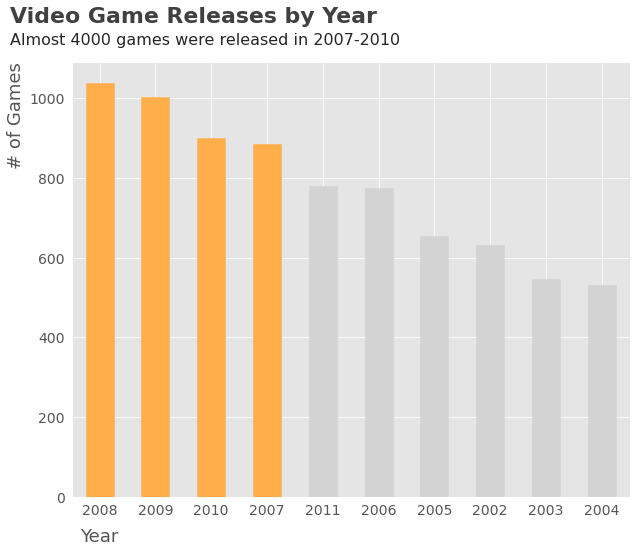

In [16]:
# All cols except for Rank and Publisher will sum up values,
# the Rank and Publisher columns will maintain only the first occurrence
agg_funcs = {
    "Rank": "first",
    "Publisher": "first",
    "NA_Sales": "sum",
    "EU_Sales": "sum",
    "JP_Sales": "sum",
    "Other_Sales": "sum",
    "Global_Sales": "sum",
}
grouped = g.groupby(["Name", "Year"]).aggregate(agg_funcs)

# Reset Year index and count games by year
games_by_year = (
    grouped.reset_index("Year")
    .groupby("Year")
    .count()["Rank"]
    .sort_values(ascending=False)
    .head(10)
)

# Round indexes
games_by_year.index = games_by_year.index.astype(int)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
games_by_year.plot(kind="bar")

# Rotate x ticks
plt.xticks(rotation=0)

# Pad x label
plt.xlabel("Year", labelpad=10)

# Title
plt.text(
    x=-0.11,
    y=1.09,
    s="Video Game Releases by Year",
    fontdict=font_title,
    transform=ax.transAxes,
)

# Subtitle
plt.text(
    x=-0.11,
    y=1.04,
    s="Almost 4000 games were released in 2007-2010",
    fontdict=font_subtitle,
    transform=ax.transAxes,
)

# Set plot style
plot_style()

# y and axis labels
plt.ylabel("# of Games", ha="right", y=1)
plt.xlabel("Year", ha="left", x=0.015)

# Color the first 4 bars
for bar in plt.gca().patches:
    if bar.get_height() < 850:
        bar.set_color("lightgrey")
    else:
        bar.set_color("#FFAE49")

plt.show()

Out of almost 12000 games released from 1980 to 2016, roughly 4000 games were released in just 4 years. 

Let's look at the percentages of game releases in the top 10 years.

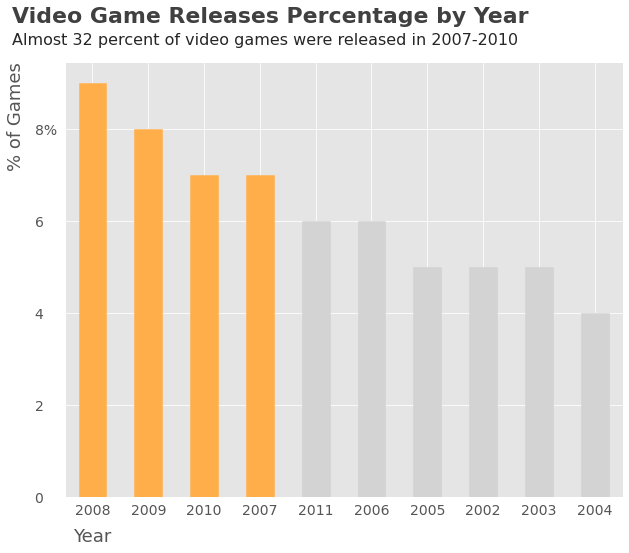

In [17]:
# Compute the percentage of game releases in top 10 years
games_by_year_perc = (
    ((games_by_year.head(10) / grouped.shape[0]) * 100).round().astype(int)
)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
games_by_year_perc.plot(kind="bar")

# Rotate x ticks
plt.xticks(rotation=0)

# Pad x axis title
plt.xlabel("Year", labelpad=10)

# Name and pad y axis title
plt.ylabel("Percentage of Releases", labelpad=10)

# Set y tick labels
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(labels=["0   ", "2   ", "4   ", "6   ", "8%", 10])

# Title
plt.text(
    x=-0.095,
    y=1.09,
    s="Video Game Releases Percentage by Year",
    fontdict=font_title,
    transform=ax.transAxes,
)

# Subtitle
plt.text(
    x=-0.095,
    y=1.04,
    s="Almost 32 percent of video games were released in 2007-2010",
    fontdict=font_subtitle,
    transform=ax.transAxes,
)

# y and axis labels
plt.ylabel("% of Games", ha="right", y=1)
plt.xlabel("Year", ha="left", x=0.015)

# Set plot style
plot_style()

# Color the first 4 bars
for bar in plt.gca().patches:
    if bar.get_height() < 7:
        bar.set_color("lightgrey")
    else:
        bar.set_color("#FFAE49")

Almost 1/3 of all the games released in 36 years (1980-2016) were released in only 4 years at the end of the first decade of the 21st century.

It's worth noting, however, that the dataset includes only the games with more than 10000 global sales. In the last 10 years, we've seen a boom of indie game developers. For instance, from 2014 there was an [enormous increase](https://www.statista.com/statistics/552623/number-games-released-steam/) in games released on Steam.

Let's now find out what were the most sold games in each of these 4 years and what were the most successful platforms.

In [18]:
grouped.reset_index("Year", inplace=True)
grouped

,Year,Rank,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
'98 Koshien,1998.0,4756,Magical Company,0.15,0.10,0.12,0.03,0.41
.hack//G.U. Vol.1//Rebirth,2006.0,8359,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
.hack//G.U. Vol.2//Reminisce,2006.0,7109,Namco Bandai Games,0.11,0.09,0.00,0.03,0.23
.hack//G.U. Vol.2//Reminisce (jp sales),2006.0,8604,Namco Bandai Games,0.00,0.00,0.16,0.00,0.16
.hack//G.U. Vol.3//Redemption,2007.0,8306,Namco Bandai Games,0.00,0.00,0.17,0.00,0.17
...,...,...,...,...,...,...,...,...
thinkSMART FAMILY!,2010.0,14387,Conspiracy Entertainment,0.03,0.00,0.00,0.00,0.03
thinkSMART: Chess for Kids,2011.0,16417,Mentor Interactive,0.01,0.00,0.00,0.00,0.01
uDraw Studio,2010.0,628,THQ,1.67,0.58,0.00,0.20,2.46


In [19]:
# Display games with most sale in 2007-2010
idx = grouped.groupby("Year")["Global_Sales"].transform(max) == grouped["Global_Sales"]
grouped[(idx) & (grouped["Year"].between(2007, 2010))].sort_values("Year")

,Year,Rank,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,
Wii Fit,2007.0,14,Nintendo,8.94,8.03,3.60,2.15,22.72
Mario Kart Wii,2008.0,3,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,2009.0,4,Nintendo,15.75,11.01,3.28,2.96,33.00
Call of Duty: Black Ops,2010.0,32,Activision,17.01,8.69,0.59,3.12,29.40


It's interesting to notice that *Wii Fit* is very popular in Japan, which is not the case for *Call of Duty: Black Ops*. The number of sales of *Call of Duty* on the Japanese market is almost 30 times less than on the American market, although the difference in sales for Wii Fit is only 2.5 times.

Let's look at the graphical representation of the most sold games in 2007-2010.

Text(-0.63, 1.06, 'Most Sold Games in 2007-2010')

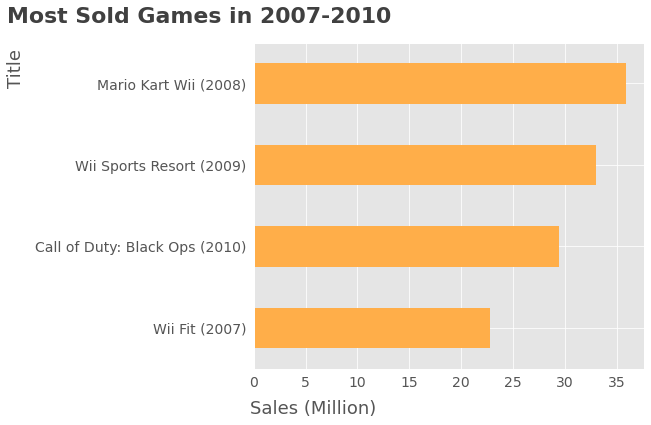

In [20]:
# Plot the most sold games in 2007-2010
ax = (
    grouped[(idx) & (grouped["Year"].between(2007, 2010))]
    .sort_values("Global_Sales")
    .plot(y="Global_Sales", kind="barh", figsize=(7, 6), legend=False, color="#FFAE49")
)

# Set plot style
plot_style()

# Set, align and pad x and y axis titles
plt.xlabel(xlabel="Sales (Million)", labelpad=10, ha="left", x=-0.009)
plt.ylabel(ylabel="Title", labelpad=10, ha="right", y=0.98)

# Add release years to games
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[0] += " (2007)"
labels[1] += " (2010)"
labels[2] += " (2009)"
labels[3] += " (2008)"

# Set updated labels
ax.set_yticklabels(labels)

# Title
plt.text(
    x=-0.63,
    y=1.06,
    s="Most Sold Games in 2007-2010",
    fontdict=font_title,
    transform=ax.transAxes,
)

It is curious to notice that in three years the most sold games were for the Wii platform, developed by Nintendo from Japan.

Let's now find out the most successful platforms in these four years in terms of sales.

In [21]:
y_07_10 = g[g["Year"].between(2007, 2010)]  # Select only the years 2007-2010
grouped_plat_year = y_07_10.groupby(["Year", "Platform"]).sum()["Global_Sales"]
grouped_plat_year[grouped_plat_year.groupby(level=0).idxmax()]

Year    Platform
2007.0  Wii         154.97
2008.0  Wii         174.16
2009.0  Wii         210.44
2010.0  X360        171.05
Name: Global_Sales, dtype: float64

In three out of four most successful years the Wii platform dominated the market.

## History of Sales, Platforms, Genres, Publishers and Game Franchises

It is also interesting to look at the overall development and current situation of the video game industry. We will split the analysis into the following sections:

1. Sales
2. Platforms 
3. Genres 
4. Publishers 
5. Franchises

### Historical Sales

First of all, let's see how the video game industry was developing in the last 35 years.

Text(1974, 750, 'Games Sold by Year')

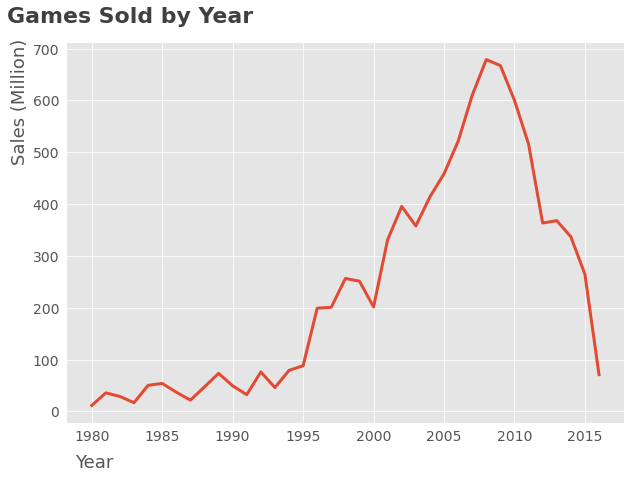

In [22]:
# Plot
fig, ax = plt.subplots(figsize=(10, 7))
plt.plot(g.pivot_table(index="Year", values="Global_Sales", aggfunc=sum), linewidth=3)

# Apply plot style
plot_style()

# Set, pad and align x axis title
plt.xlabel("Year", labelpad=10, ha="left", x=0.015)

# Set y axis title
plt.ylabel("Sales (Million)", ha="left", y=0.68)

# TItle
plt.text(x=1974, y=750, s="Games Sold by Year", fontdict=font_title)

Firstly, it is important to notice that the dataset was updated in 2016, so many games of 2014-2016 haven't got enough time to accumulate the sales hence we see a big decrease in those years. However, we can also think that there was a real decrease in sold copies of games (at least, in 2014-2015) since the sales peak of many video games is in the first year of their release.

Secondly, we see a **quick increase in sales after 1995** which contrasts with flat growth in the preceding years.

Finally, the most curious finding is that the **sales peak was reached in 2008**, when an economic crisis hit the world. It seems like people tended to entertain themselves more (probably due to the loss of jobs).

Only 204 games (even less if we consider that the same game can be released on different platforms) reached 5 million sold items so we may think that they drastically change the overall situation of sales over the years (just think about 2006 *Wii Sports* with over 80 million sold items). Hence, let's narrow down the analysis for only the games with less than 5 million sales.

We will also compare two plots (with all sales and less than 5 million sales).

In [23]:
# Number of games with less than 5 million sales
print(
    "Number of games with less than 5 million sales: {}".format(
        g[g["Global_Sales"] > 5].shape[0]
    )
)

Number of games with less than 5 million sales: 204


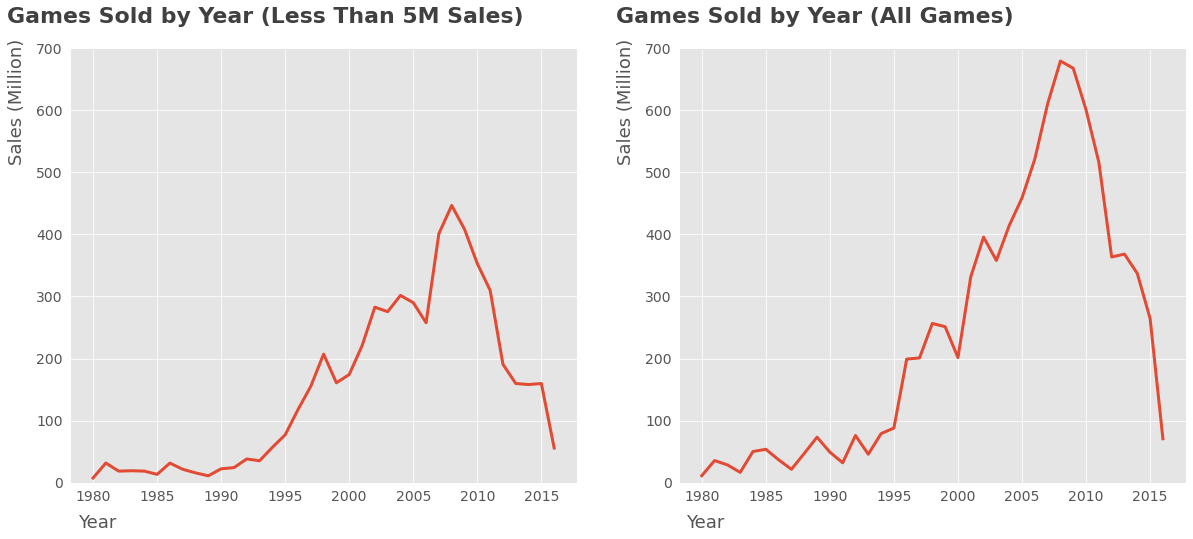

In [24]:
# Add year to aggregation functions
agg_funcs["Year"] = "first"

# Games with less than 5 million sales
less_5kk_sales = g.groupby("Name").aggregate(agg_funcs)
less_5kk_sales = less_5kk_sales[less_5kk_sales["Global_Sales"] < 5]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
ax[0].plot(
    less_5kk_sales.pivot_table(index="Year", values="Global_Sales", aggfunc=sum),
    linewidth=3,
)
ax[1].plot(g.pivot_table(index="Year", values="Global_Sales", aggfunc=sum), linewidth=3)

# TItles
ax[0].text(
    x=1973.3, y=740, s="Games Sold by Year (Less Than 5M Sales)", fontdict=font_title
)
ax[1].text(x=1973.3, y=740, s="Games Sold by Year (All Games)", fontdict=font_title)

# Set y limit on the plots to allow comparison between the two
ax[0].set_ylim(0, 700)
ax[1].set_ylim(0, 700)

# Set plot style
for i in range(2):
    # Tick params
    ax[i].tick_params(axis="both", labelsize=14, bottom=False, left=False)

    # Set and pad x axis title
    ax[i].set_xlabel("Year", size=18, labelpad=10, ha="left", x=0.015)

    # Set y axis title
    ax[i].set_ylabel("Sales (Million)", size=18, labelpad=10, ha="left", y=0.73)

As you can see the situation did not change. The years with the highest sales were 2007-2008 with big increases after 1995 and 2000.

Let's also zoom on the most and the least successful years in terms of sales.

Text(0.5, 0.98, 'Most and Least Successful Years in Video Games Industry')

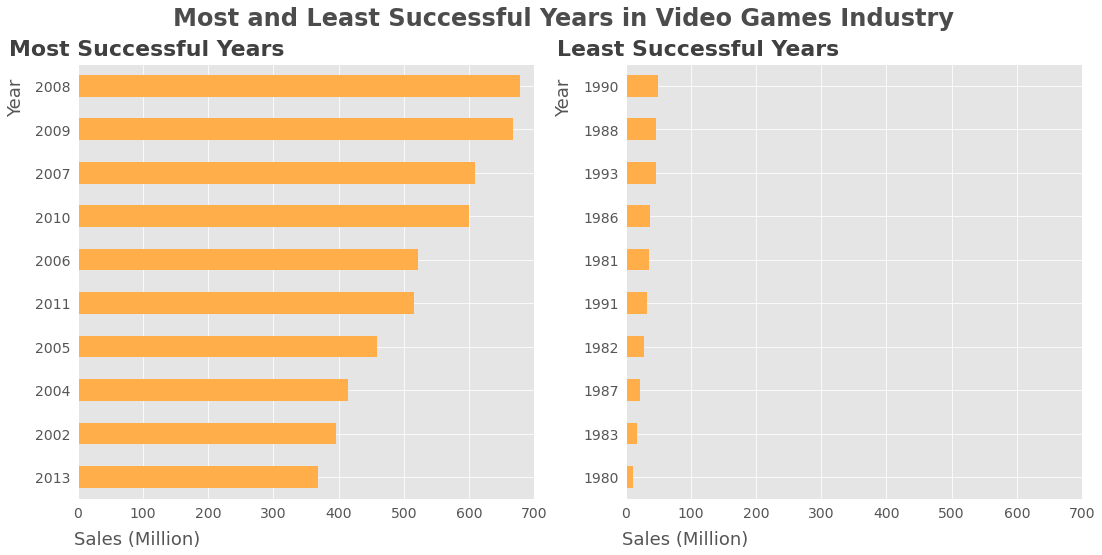

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# First plot
grouped_head = (
    g.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False).head(10)
)
grouped_head.index = grouped_head.index.astype(int)
grouped_head.plot(kind="barh", ax=ax[0], color="#FFAE49")

# Title: first plot
ax[0].text(x=-105, y=-0.7, s="Most Successful Years", fontdict=font_title)

# Second plot
grouped_tail = (
    g.groupby("Year")["Global_Sales"].sum().sort_values(ascending=False).tail(10)
)
grouped_tail.index = grouped_tail.index.astype(int)
grouped_tail.plot(kind="barh", ax=ax[1], color="#FFAE49")

# Set x and y limits to compare the two plots
ax[0].set_xlim(0, 700)
ax[1].set_xlim(0, 700)

# TItle: second plot
ax[1].text(x=-105, y=-0.7, s="Least Successful Years", fontdict=font_title)

# Set plot style
for i in range(2):
    # Tick params
    ax[i].tick_params(axis="both", labelsize=14, bottom=False, left=False)

    # Set and pad x axis title
    ax[i].set_xlabel("Sales (Million)", size=18, labelpad=10, ha="left", x=-0.008)

    # Set y axis title
    ax[i].set_ylabel("Year", size=18, labelpad=10, ha="left", y=0.88)

# Invert axes
ax[0].invert_yaxis()
ax[1].invert_yaxis()

# Main title
fig.suptitle(
    "Most and Least Successful Years in Video Games Industry",
    fontsize=24,
    alpha=0.7,
    fontweight="bold",
)

As confirmed in the time course of global sales before, all the years with the highest years are after 2000. On the other hand, **the least successful years in the video game industry are before the first high spike of sales in 1995**. The sales in the 80s and the first half of the 90s haven't even got close to the 21th-century sales, reaching at most 50 million (in 1990).

In the next section, we will analyze game sales in different markets.

#### Markets Development

It should be also interesting to analyze the market development in different countries/continents. It's worth noting that we are analyzing four very different markets in terms of size: for instance, Europe is a big continent with dozens of countries while Japan is just one country. We will have to take these differences into account.

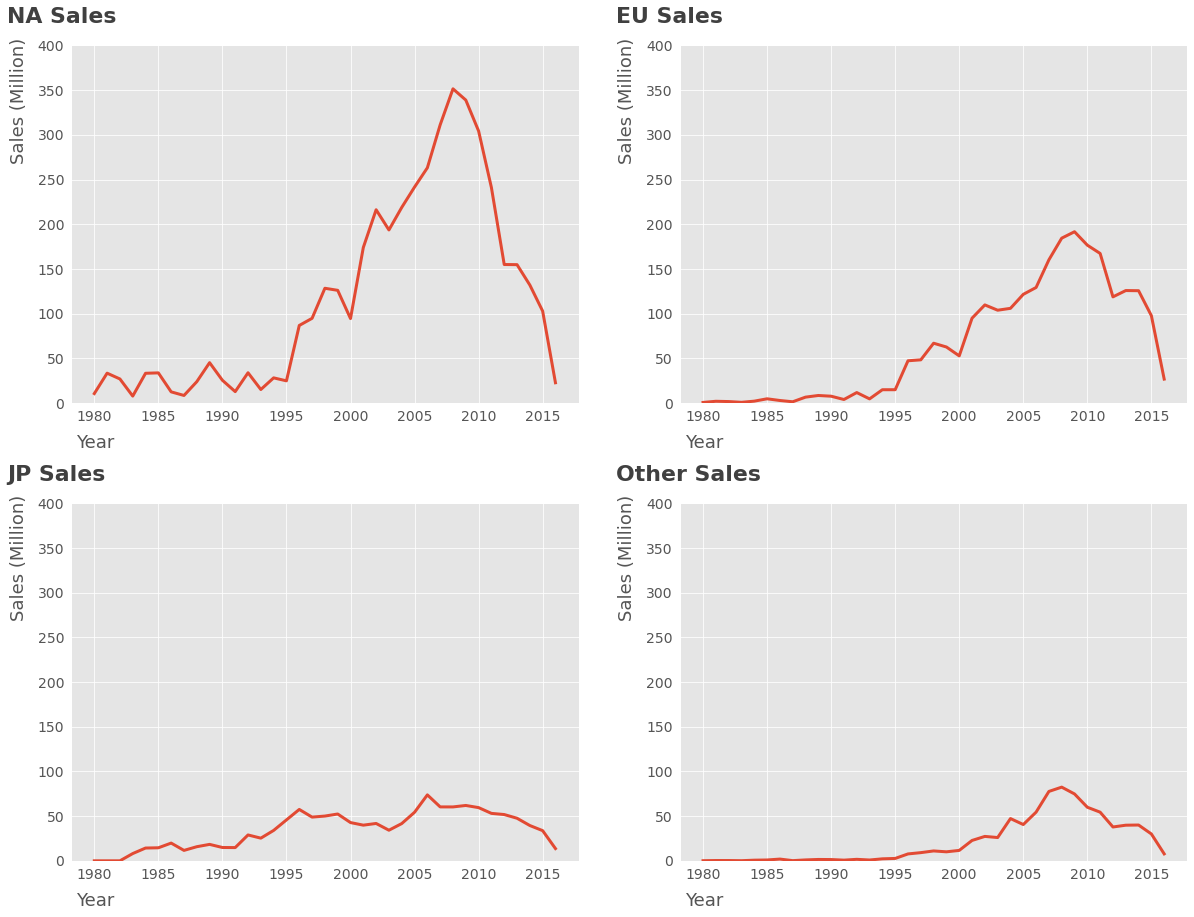

In [26]:
# Figure
fig = plt.figure(figsize=(20, 15))

markets = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

# Plots
for i, mkt in enumerate(markets):
    ax = fig.add_subplot(2, 2, i + 1)
    grouped = g.groupby("Year")[mkt].sum()
    grouped.plot(linewidth=3)

    # Y axis limit from 0 to 400 to correctly compare plots
    ax.set_ylim(0, 400)

    # Remove underscore for titles
    s = mkt.replace("_", " ")

    # Title
    ax.text(x=1973.2, y=425, s=s, fontdict=font_title)

    # Tick params
    ax.tick_params(axis="both", labelsize=14, bottom=False, left=False)

    # Set, pad and align x and y axis titles
    ax.set_xlabel("Year", size=18, labelpad=10, ha="left", x=0.01)
    ax.set_ylabel("Sales (Million)", size=18, labelpad=10, ha="left", y=0.67)

# Add vertical spacing
fig.subplots_adjust(hspace=0.28)

The video games **sales in North America and Europe exceed by far the sales in Japan and the rest of the world**. These two markets both had a quick growth in sales in 1995 while, Japan had flatter sales growth. Moreover, Japan has a flat distribution of sales between 1995 and 2010 without "rapid-growth" years which contrasts with Europe and North America. 

North America is a clear winner reaching at most 350 million sales, while Europe did not exceed 200 million sales and Japan 75 million sales.

As said before, we have to take into account the differences in market size. We will use the population as a proxy to better analyze the markets. However, we will not consider the population growth between 1980 and 2015.

Currently, North America has 579 million inhabitants, Europe 741 million and Japan 126 million. The rest of the world should exceed 5 billion inhabitants but it's better to exclude it from the analysis since we have to assume that VGChartz collected more reliable data about the three main markets in the video game industry.

Thus, let's take the "maximum sales" year and compute the sales/inhabitant ratio. In this case, to better estimate the number we will take [population data by continent](https://en.wikipedia.org/wiki/List_of_continents_by_population) for 2010 (the closest year to peaks in North America and Europe) and [Japanese historical population data](https://en.wikipedia.org/wiki/Demographics_of_Japan#Historical_population) for 2010.

In [27]:
na_sales_max = g.groupby("Year")["NA_Sales"].sum().max()
eu_sales_max = g.groupby("Year")["EU_Sales"].sum().max()
jp_sales_max = g.groupby("Year")["JP_Sales"].sum().max()

print(f"Sales/inhabitant ratio in North America: {na_sales_max/546.867:.2f}")
print(f"Sales/inhabitant ratio in Europe: {eu_sales_max/735.395:.2f}")
print(f"Sales/inhabitant ratio in Japan: {jp_sales_max/128.057:.2f}")

Sales/inhabitant ratio in North America: 0.64
Sales/inhabitant ratio in Europe: 0.26
Sales/inhabitant ratio in Japan: 0.58


Sales per inhabitant in North America and Japan are very close, while in Europe this ratio is almost three times smaller than in North America.

In the next section, we will analyze global and market sales of gaming platforms.

### Platform Sales

First of all, let's have a look at the overall platform sales or, in other words, what is the top 10 platforms in terms of sales?

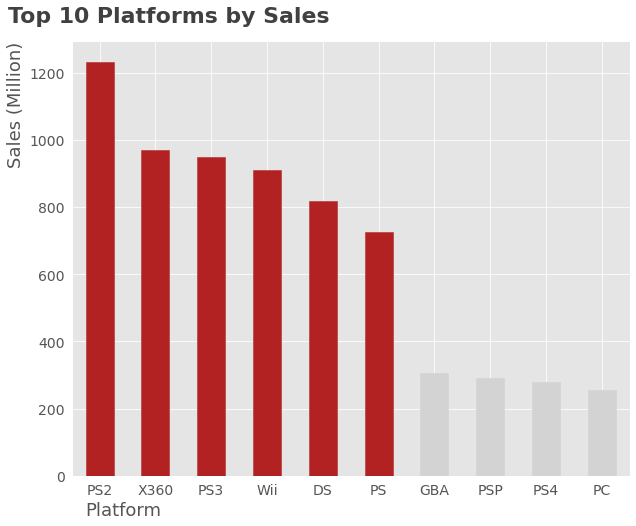

In [28]:
sales_for_platform = (
    g.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(10, 8))
ax = sales_for_platform.head(10).plot.bar()

# Set plot style
plot_style()

# x and y labels
ax.set_xlabel("Platform", ha="left", x=0.025)
ax.set_ylabel("Sales (Million)", ha="right", y=1)

# Rotate xticklabels
plt.xticks(rotation=0)

# Title
ax.text(s="Top 10 Platforms by Sales", x=-1.65, y=1350, fontdict=font_title)

# Color the first 4 bars
for bar in plt.gca().patches:
    if bar.get_height() < 400:
        bar.set_color("lightgrey")
    else:
        bar.set_color("firebrick")

The clear winner among the platforms is PlayStation 2, with over 1.2 billion global sales, followed by Xbox 360, PlayStation 3, Nintendo DS and PlayStation 1.

Now, let's have look at platforms with the highest number of released games.

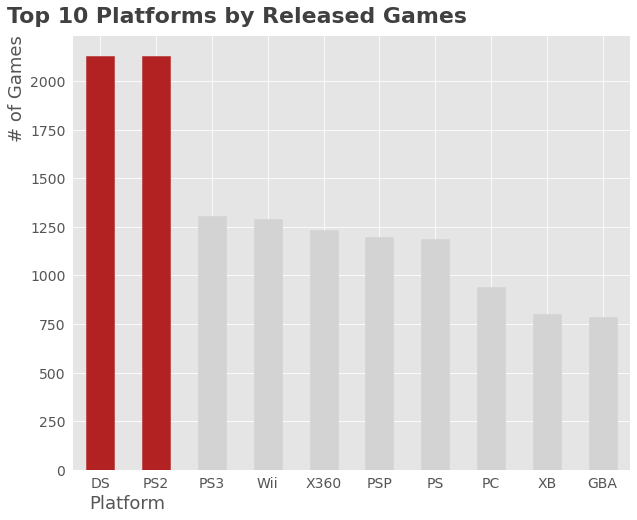

In [29]:
games_for_platform = g["Platform"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
ax = games_for_platform.head(10).plot.bar(color="firebrick")

# Set plot style
plot_style()

# x and y labels
ax.set_xlabel("Platform", ha="left", x=0.03)
ax.set_ylabel("# of Games", ha="right", y=1)

# Rotate xticklabels
plt.xticks(rotation=0)

# Title
ax.text(s="Top 10 Platforms by Released Games", x=-1.67, y=2300, fontdict=font_title)

# Color the first 4 bars
for bar in plt.gca().patches:
    if bar.get_height() < 1500:
        bar.set_color("lightgrey")
    else:
        bar.set_color("firebrick")

The platform with the highest number of released games is the Nintendo DS, which has the edge on the PlayStation 2 thanks to only a bunch of games.

At this point, we already can make some conclusions:

1. The most popular platform of all times is PlayStation 2, which had  both a staggering amount of sales and games released
2. PlayStation 2 is the only console that had more than 1 billion sales
3. The two platform that had the highest number of released games are Nintendo DS and PlayStation 2, both with over 2000 released games 

#### History of Top 10 Platforms

Now, we will take the top 6 platforms (by sales) and have a look at their historical development. Before plotting we have to delete a row for Nintendo DS in 1985 since this platform was released only in 2004.

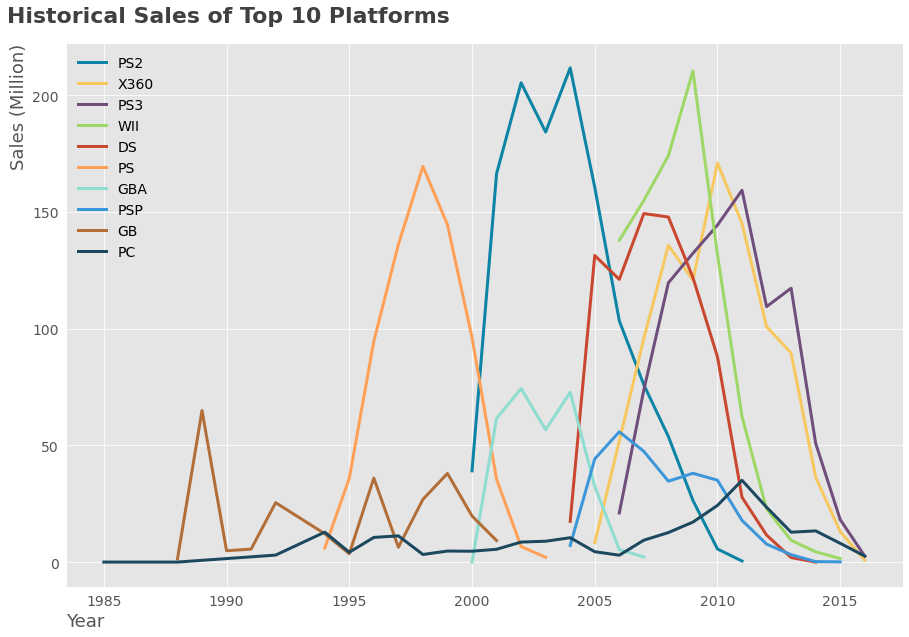

In [30]:
# Slice the relevant platforms
ps2 = g[g["Platform"] == "PS2"]
xbox = g[g["Platform"] == "X360"]
ps3 = g[g["Platform"] == "PS3"]
wii = g[g["Platform"] == "Wii"]
ds = g[g["Platform"] == "DS"]
ps = g[g["Platform"] == "PS"]
gba = g[g["Platform"] == "GBA"]
psp = g[g["Platform"] == "PSP"]
gb = g[g["Platform"] == "GB"]
pc = g[g["Platform"] == "PC"]

# Delete incorrect row for Nintendo DS
ds[ds["Year"] == 1985]
ds = ds.drop(15867)

# Plot
plt.figure(figsize=(15, 10))

y1 = ps2.groupby("Year")["Global_Sales"].sum()
y2 = xbox.groupby("Year")["Global_Sales"].sum()
y3 = ps3.groupby("Year")["Global_Sales"].sum()
y4 = wii.groupby("Year")["Global_Sales"].sum()
y5 = ds.groupby("Year")["Global_Sales"].sum()
y6 = ps.groupby("Year")["Global_Sales"].sum()
y7 = gba.groupby("Year")["Global_Sales"].sum()
y8 = psp.groupby("Year")["Global_Sales"].sum()
y9 = gb.groupby("Year")["Global_Sales"].sum()
y10 = pc.groupby("Year")["Global_Sales"].sum()

plt.plot(y1, label="PS2", color="#0B84A5", linewidth=3)
plt.plot(y2, label="X360", color="#F6C85F", linewidth=3)
plt.plot(y3, label="PS3", color="#6F4E7C", linewidth=3)
plt.plot(y4, label="WII", color="#9DD866", linewidth=3)
plt.plot(y5, label="DS", color="#CA472F", linewidth=3)
plt.plot(y6, label="PS", color="#FFA056", linewidth=3)
plt.plot(y7, label="GBA", color="#8DDDD0", linewidth=3)
plt.plot(y8, label="PSP", color="#3C97DA", linewidth=3)
plt.plot(y9, label="GB", color="#B26E39", linewidth=3)
plt.plot(y10, label="PC", color="#1B485E", linewidth=3)

# Plot style
plot_style()

# x and y labels

plt.xlabel("Year", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Historical Sales of Top 10 Platforms", ha="left", x=-0.07, va="bottom", y=1.02, fontdict=font_title
)

# Customize the legend
plt.legend(loc="upper left", fontsize=14, frameon=False)

Conclusions:

1. PC games have been around for a lot of times but their sales did not go really high, especially if compared to the other consoles
2. There is a trend: after the release of a console, its sales go up for about 5 years, and then they start to decline due to the launch of a new generation of the consoles (this is clear if we look at the PlayStation lines)
3. Every platform had one or two peaks of sales, generally in the first two years from the launch
4. It is evident that the clear winner is PlayStation 2, which dominates the market of video games from 2000 to 2005
5. After 2005, the throne of most successful platform sees a fight between four platforms, PlayStation 3, Xbox 360, Wii and Nintendo DS
6. Another interesting fact is that computer sales show a significant increase after 2005, together with the release of a bunch of new consoles

It would be also interesting to look at the platform's popularity in different markets.

Text(0, 1, 'Sales (Million)')

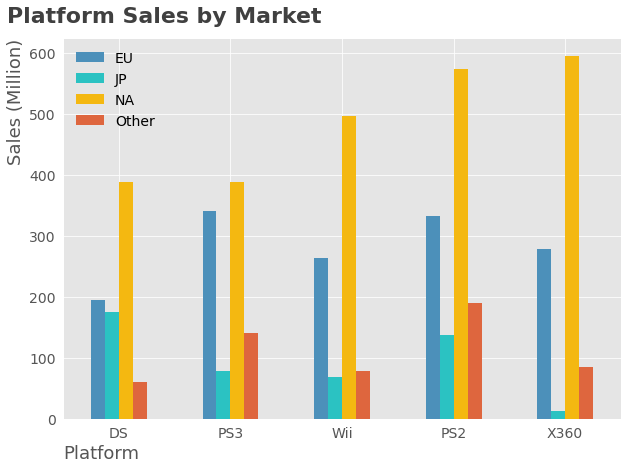

In [31]:
# Prepare data for plotting
melted = pd.melt(
    g,
    id_vars=["Platform"],
    value_vars=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"],
    var_name=["Market"],
)

# We will sort by NA sales since it's the largest market
colors = ["#4C90BA", "#2BC2C2", "#F4B811", "#DE663E"]
labs = ["EU", "JP", "NA", "Other"]
ax = (
    melted.pivot_table(
        index="Platform", columns="Market", values="value", aggfunc="sum"
    )
    .sort_values("NA_Sales")
    .tail()
    .plot(kind="bar", figsize=(10, 7), color=colors)
)

# Rotate labels
plt.xticks(rotation=0)

# Set plot style
plot_style()

# Customize legend
ax.legend(frameon=False, labels=["EU", "JP", "NA", "Other"], fontsize=14)

# TItle
ax.text(x=-1, y=650, s="Platform Sales by Market", fontdict=font_title)

# Set x and y axis titles
ax.set_xlabel("Platform", ha="left", x=0)
ax.set_ylabel("Sales (Million)", ha="right", y=1)

At the first glance, we can see that:

1. XBOX 360 isn't very popular in Japan
2. Nintendo DS popularity is almost identical in Europe and Japan
3. Wii popularity is identical in Japan and the rest of the world

#### PlayStation Generations 

Let's now zoom in the data and compare the success of different generation of PlayStation and their historical development.

Text(0, 1, 'Sales (Million)')

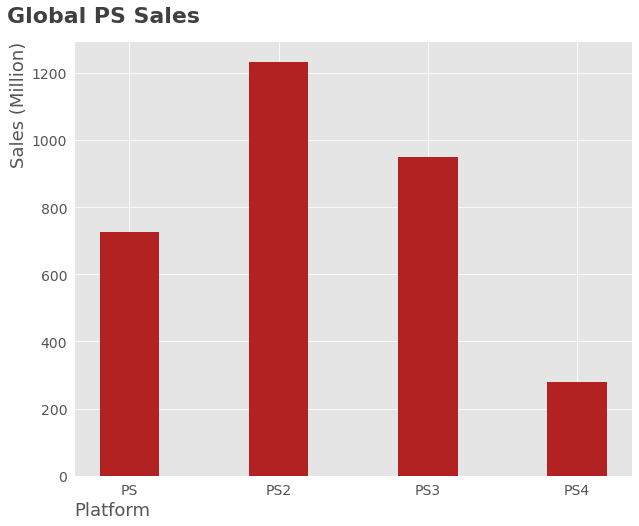

In [32]:
# Subset Playstations
ps = g[(g["Platform"] == "PS")]["Global_Sales"].sum()
ps2 = g[(g["Platform"] == "PS2")]["Global_Sales"].sum()
ps3 = g[(g["Platform"] == "PS3")]["Global_Sales"].sum()
ps4 = g[(g["Platform"] == "PS4")]["Global_Sales"].sum()

# Bars and bar labels
play_sales = [ps, ps2, ps3, ps4]
play_lab = ["PS", "PS2", "PS3", "PS4"]

# Plot
fig = plt.figure(figsize=(10, 8))
plt.bar(play_lab, play_sales, color="firebrick", width=0.4)

# Plot style
plot_style()

# Title
plt.title(
    "Global PS Sales",
    fontdict=font_title,
    ha="left",
    va="bottom",
    x=-0.12,
    y=1.02,
)

# x and y labels
plt.xlabel("Platform", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

To have an idea of the sales of these consoles over the years we will draw a time-course plot.

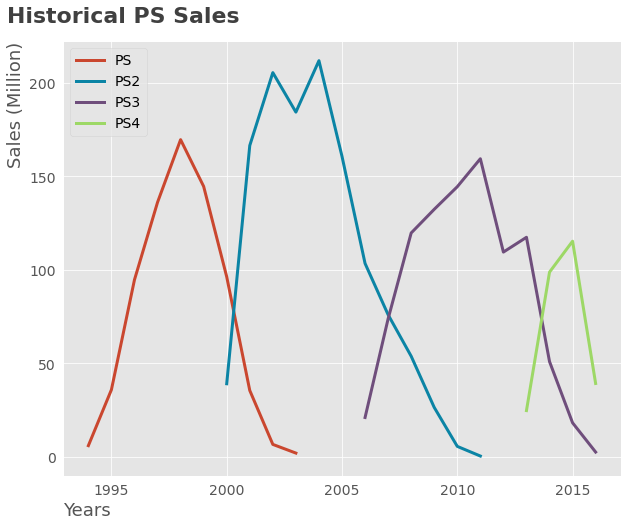

In [33]:
# Subset and group PS4
g_ps4 = g[g["Platform"] == "PS4"]
y_ps4 = g_ps4.groupby("Year")["Global_Sales"].sum()

# Plot
plt.figure(figsize=(10, 8))

plt.plot(y6, label="PS", color="#CA472F", linewidth=3)
plt.plot(y1, label="PS2", color="#0B84A5", linewidth=3)
plt.plot(y3, label="PS3", color="#6F4E7C", linewidth=3)
plt.plot(y_ps4, label="PS4", color="#9DD866", linewidth=3)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Years", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Historical PS Sales", ha="left", va="bottom", x=-0.1, y=1.02, fontdict=font_title
)

# Legent
plt.legend(loc="upper left", fontsize=14)

Conclusions:
    
1. Among the four PS generations the clear winner is PlayStation 2, with more than 200 million sales 
2. From the time course plot we can appreciate how the PlayStation sales variate with the time, growing for the first five years from the release and then decreasing for the following five years (exception for PlayStation 4)
3. This decrease is caused by the release of the new generation
4. The data on PlayStation 4 are not informative because the sales have been registered for only three years, while for the other iteration we have around nine to eleven years of data
5. Both PlayStation 1 and 3 sales decrease way more rapidly than the sales of PlayStation 2; this fact is due to the longer support that PlayStation 2 received and the huge amount of games released for it

#### Platform Sales Before and After 2000

In this section, we will continue exploring the historical development of the platforms. In particular, we will split them into two groups: those that had most the sales before 2000 and those after 2000.

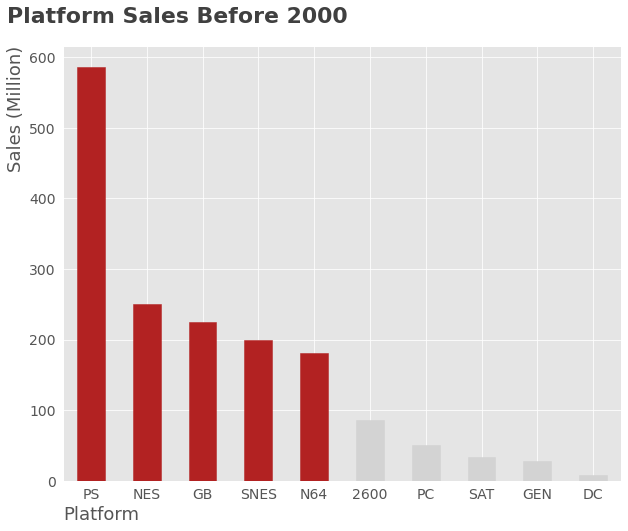

In [34]:
# Subset before 2000
before = g[(g["Year"] < 2000)]
before = before.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

# Figure
plt.figure(figsize=(10, 8))
before.head(10).plot.bar(color="firebrick", rot=0)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Platform", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Platform Sales Before 2000",
    ha="left",
    va="bottom",
    x=-0.1,
    y=1.03,
    fontdict=font_title,
)

# Color the first 5 bars
for bar in plt.gca().patches:
    if bar.get_height() < 150:
        bar.set_color("lightgrey")
    else:
        bar.set_color("firebrick")

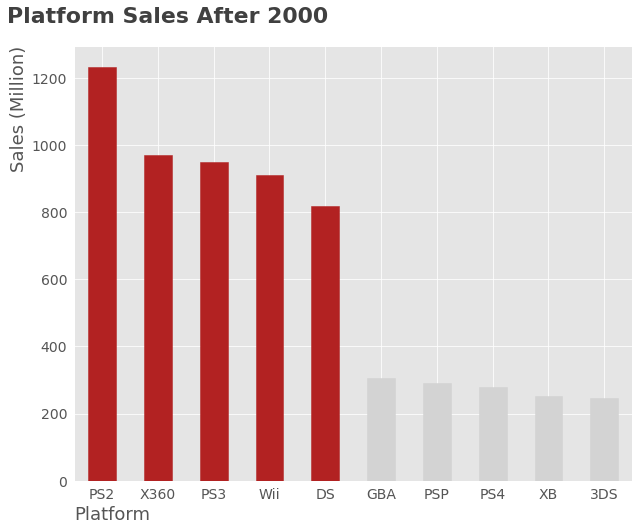

In [35]:
# Subset after 2000
after = g[(g["Year"] >= 2000)]
after = after.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
after.head(10).plot.bar(color="firebrick", rot=0)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Platform", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Platform Sales After 2000",
    ha="left",
    va="bottom",
    x=-0.12,
    y=1.03,
    fontdict=font_title,
)

# Color the first 5 bars
for bar in plt.gca().patches:
    if bar.get_height() < 400:
        bar.set_color("lightgrey")
    else:
        bar.set_color("firebrick")

Conclusion:
    
1. Looking at the two bar plot, is clear how the market has undergone a strong increase in sales after 2000, thanks to the higher accessibility of gaming consoles
2. Before 2000 the clear winner is the PlayStation 1, with nearly 600 million sales in only five years, since its release in 1995
3. After 2000 the winner is still a PlayStation console, PlayStation 2, with a staggering 1.2 billion sales, even if its rivals became more competitive
4. Always after 2000, excluding PlayStation 2, the other consoles which belong to the top 5 have between 800 and 1000 million sales
5. It is evident how Sony dominated the market both before and after 2000, thanks to its very popular PlayStation consoles

#### PlayStation vs Xbox: the Ultimate Showdown

Sony and Microsoft have had a long history of battles between their consoles, PlayStation and Xbox. These two video game titans release a new generation of consoles almost simultaneously this rivalry catches everyone's eye. Let's look at this battle using game sales. Well, for us it really depends on your preferences, because both consoles have unique features and exclusive games: for example, the Halo franchise is only available for Xbox consoles. But we are here to decide which is the most successful platform between the two, so we are interested in their total sales.

Text(-0.12, 1.03, 'PlayStation vs Xbox')

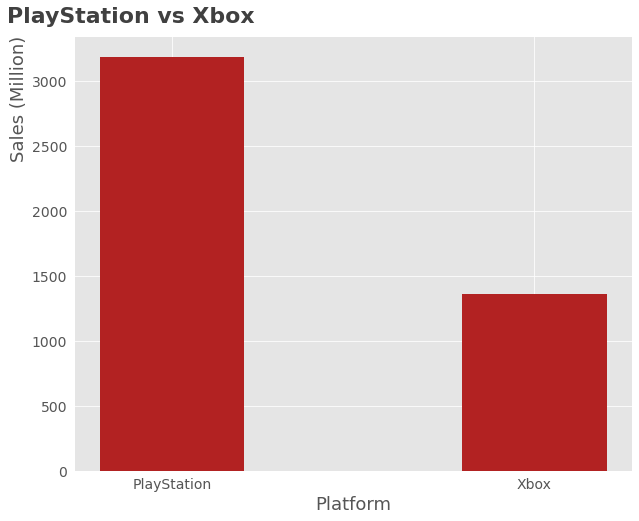

In [36]:
# Subset Xbox
xbox = g[(g["Platform"] == "XB")]["Global_Sales"].sum()
x360 = g[(g["Platform"] == "X360")]["Global_Sales"].sum()
xone = g[(g["Platform"] == "XOne")]["Global_Sales"].sum()

xbox_sales = [xbox, x360, xone]
xbox_lab = ["Xbox", "Xbox 360", "Xbox One"]

# Sum total sales for Xbox and PS
xb_tot = xbox + x360 + xone
play_tot = ps + ps2 + ps3 + ps4

# Bars and labels
tot = [play_tot, xb_tot]
labels = ["PlayStation", "Xbox"]

# Plot
fig = plt.figure(figsize=(10, 8))
plt.bar(labels, tot, color="firebrick", width=0.4)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Platform")
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "PlayStation vs Xbox", ha="left", va="center", x=-0.12, y=1.03, fontdict=font_title
)

Unfortunately, Halo was not enough for Xbox to claim the crown of most successful consoles. PlayStation consoles dominate the market with over 3 billion global sales, while Xbox arrives barely to 1.5 billion sales.

#### Portable Consoles Sales

Finally, we will compare the sales of different portable consoles, namely PSP, Game Boy, Game Boy Advance, Nintendo DS and Nintendo 3DS.

Text(-0.105, 1.03, 'Portable Consoles Sales')

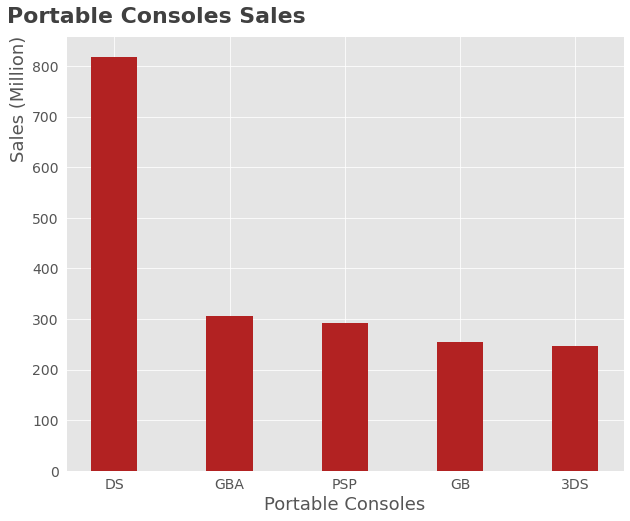

In [37]:
# Subset portable consoles and sum up their sales
psp = g[g["Platform"] == "PSP"]["Global_Sales"].sum()
gba = g[g["Platform"] == "GBA"]["Global_Sales"].sum()
gb = g[g["Platform"] == "GB"]["Global_Sales"].sum()
ds = g[g["Platform"] == "DS"]["Global_Sales"].sum()
ds3 = g[g["Platform"] == "3DS"]["Global_Sales"].sum()

# Bars and labels
val = [ds, gba, psp, gb, ds3]
lab = ["DS", "GBA", "PSP", "GB", "3DS"]

# Plot
fig = plt.figure(figsize=(10, 8))
plt.bar(lab, val, color="firebrick", width=0.4)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Portable Consoles")
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Portable Consoles Sales",
    ha="left",
    va="center",
    x=-0.105,
    y=1.03,
    fontdict=font_title,
)

Conclusions:

1. Among portable consoles, the one with more success is by far Nintendo DS, which had almost the triple sales of its nearest competitor
2. Nintendo DS was also more popular than its successor, Nintendo 3DS, and its predecessors, GameBoy and GameBoy Advance
3. PlayStation Portable was not able to replicate the success of its counterpart

### Genres Development

In this section, we are going to concentrate on genres. First of all, we will analyze a global current situation and next, we will move to analyze the historical development of the genres.

#### Genres Sales and Game Releases

First of all, we will look at the overall situation of sales and released games by genre.

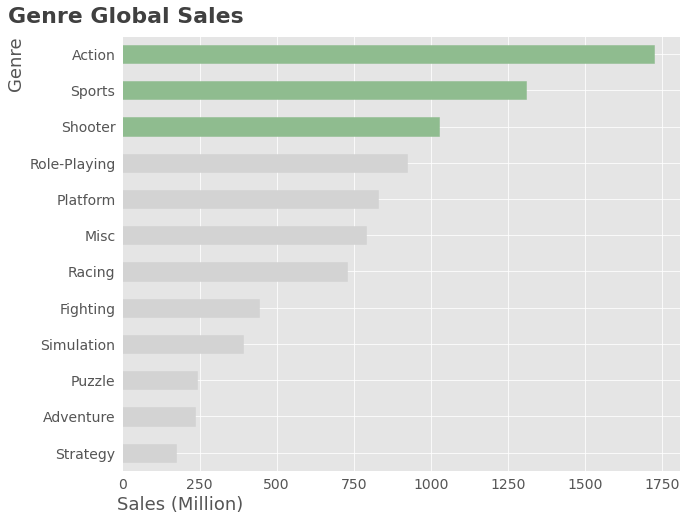

In [38]:
# Sum up global sales by genre
genre = g.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
ax = genre.plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Genre Global Sales", ha="left", va="center", x=-0.205, y=1.03, fontdict=font_title
)

for bar in ax.patches:
    if bar.get_width() > 1000:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

Globally, the genre with the highest sales is Action, followed by Sports and Shooter. These genres reached more than 1 billion in sales.

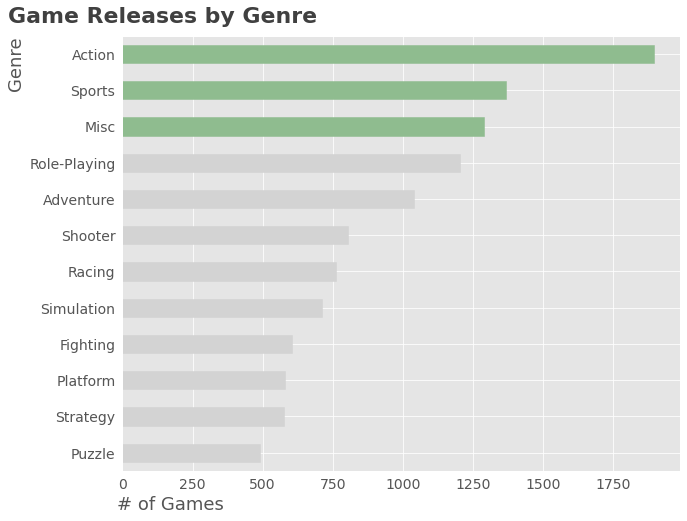

In [39]:
# Number of game releases by genre
games_for_genre = g.drop_duplicates(subset="Name")
games_for_genre = games_for_genre["Genre"].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 8))
ax = games_for_genre.plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("# of Games", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Game Releases by Genre",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

for bar in ax.patches:
    if bar.get_width() > 1250:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")


plt.show()

Globally, the genre with the highest number of released games is Action, followed by Sports and Miscellaneous.

Conclusions: 

1. Action is the genre with more sales and more games released, so it can be considered as the most popular
2. The second most popular genre is Sports because it occupies the second position in both bar plots
3. Now we are wondering if these trends will be respected in all the different markets or not?

#### Genres on Different Markets

We will also split the dataset into 4 different markets and figure out if there is any difference in sales among them. However, before proceeding on analyzing genres in the different markets, we think it is useful to have an idea of the slice of the market that every genre occupies (in percents).

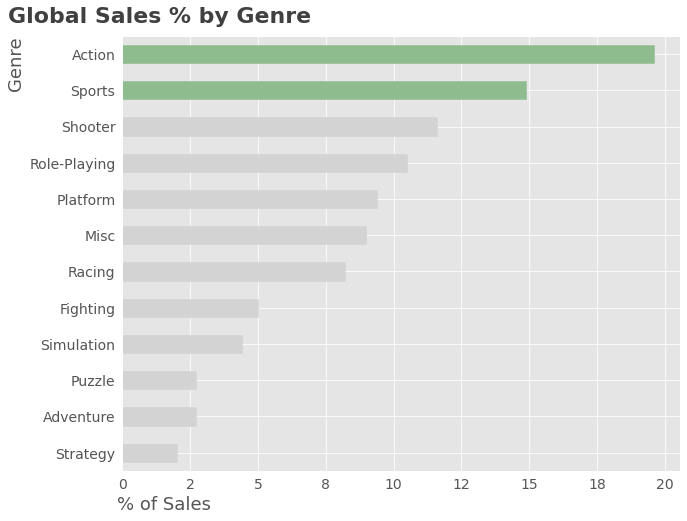

In [40]:
# Sum up sales of each genre
total_sales = genre.sum()
percentile = genre.apply(lambda x: x * 100 / total_sales).round(1)

# Plot
plt.figure(figsize=(10, 8))
ax = percentile.plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("% of Sales", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Remove decimals from x axis
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

# Title
plt.title(
    "Global Sales % by Genre",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

# Color the first two bars
for bar in ax.patches:
    if bar.get_width() > 14:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

From the bar plot, we see how the Action genre occupies almost 20% of the global market sales, followed by the Sports genre, which covers almost 15%.

Now, let's have a look at genres' popularity in different markets.

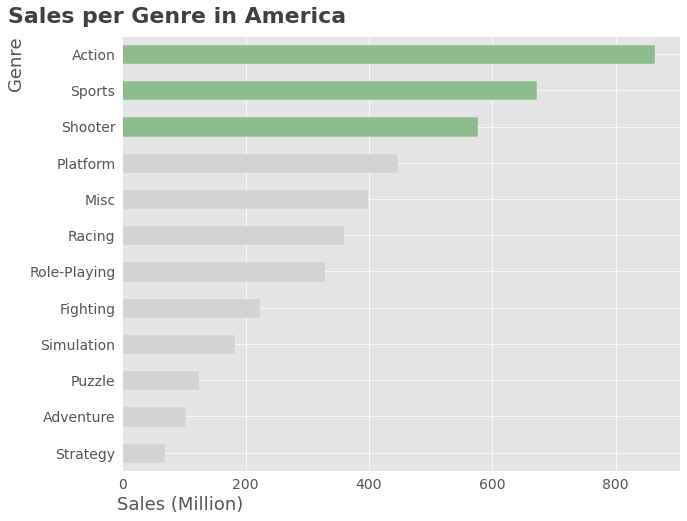

In [41]:
# Sum up global sales per market
comp_genre = (
    g[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
    .groupby("Genre")
    .sum()
)

# Plot: sales in America
plt.figure(figsize=(10, 8))
ax = comp_genre["NA_Sales"].sort_values().plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Title
plt.title(
    "Sales per Genre in America",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

for bar in ax.patches:
    if bar.get_width() > 500:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

In America, the genre with the highest sales is Action, followed by Sports and Shooter.

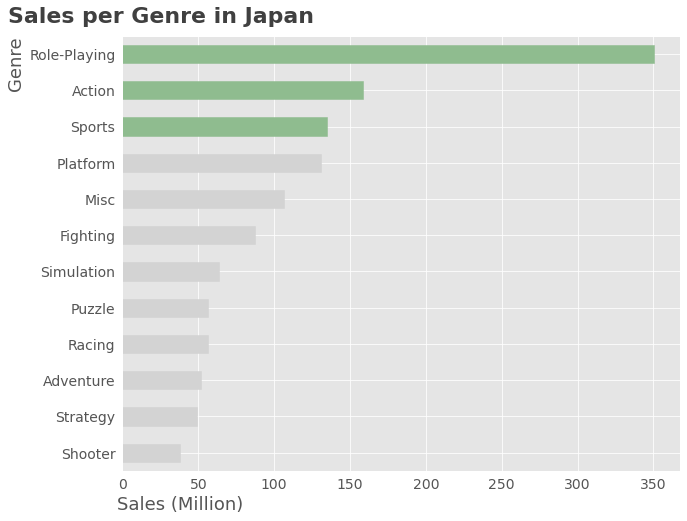

In [42]:
# Plot: Sales in Japan
plt.figure(figsize=(10, 8))
ax = comp_genre["JP_Sales"].sort_values().plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Title
plt.title(
    "Sales per Genre in Japan",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

for bar in ax.patches:
    if bar.get_width() > 131:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

In Japan, the genre with the highest sales is by far Role-Playing, followed by Action and Sports.

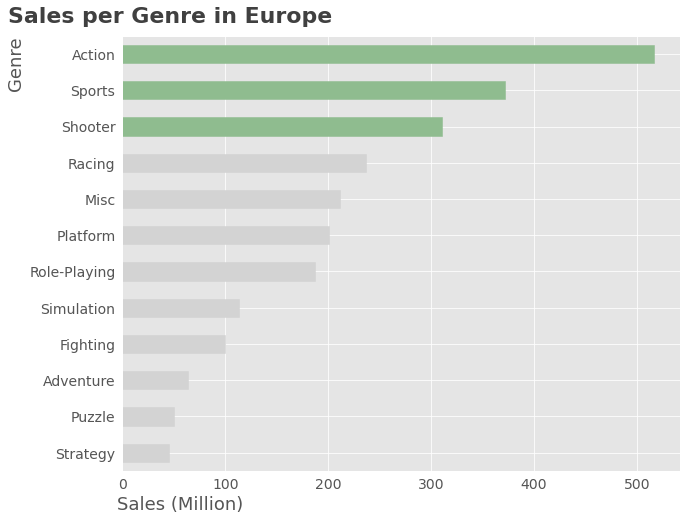

In [43]:
# Plot: Sales in Europe
plt.figure(figsize=(10, 8))
ax = comp_genre["EU_Sales"].sort_values().plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Title
plt.title(
    "Sales per Genre in Europe",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

for bar in ax.patches:
    if bar.get_width() > 300:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

In Europe, the genre with the highest sales is Action, followed by Sports and Shooter.

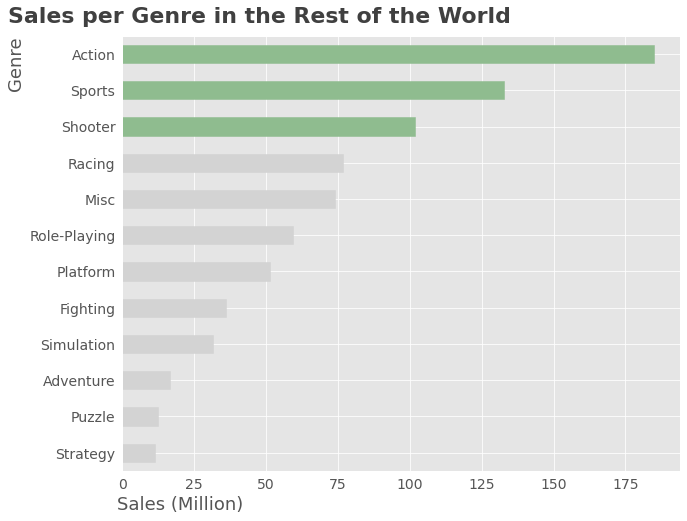

In [44]:
# Plot: Sales in the rest of the World
plt.figure(figsize=(10, 8))
ax = comp_genre["Other_Sales"].sort_values().plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Genre", ha="right", y=1)

# Title
plt.title(
    "Sales per Genre in the Rest of the World",
    ha="left",
    va="center",
    x=-0.205,
    y=1.03,
    fontdict=font_title,
)

for bar in ax.patches:
    if bar.get_width() > 100:
        bar.set_color("darkseagreen")
    else:
        bar.set_color("lightgray")

In the rest of the world, the genre with the highest sales is Action, followed by Sports and Shooter.

Conclusions:

1. The trend we observed globally is respected in America, Europe and the rest of the world
2. Instead, this trend is absent in Japan, where the most popular genre is Role-Playing by a long shot
3. The difference observed on the Japanese market does not affect the global trend
4. Perhaps, the reason behind the higher success of the Role-Playing genre in Japan is correlated to their different culture, which implies different preferences in several aspects of the life

#### Top 10 Games in Top 3 Genres

It is also interesting to figure out what are the most successful games in the top 3 genres (action, sports and RPG).

Text(-0.519, 1.03, 'Top 10 Action Games')

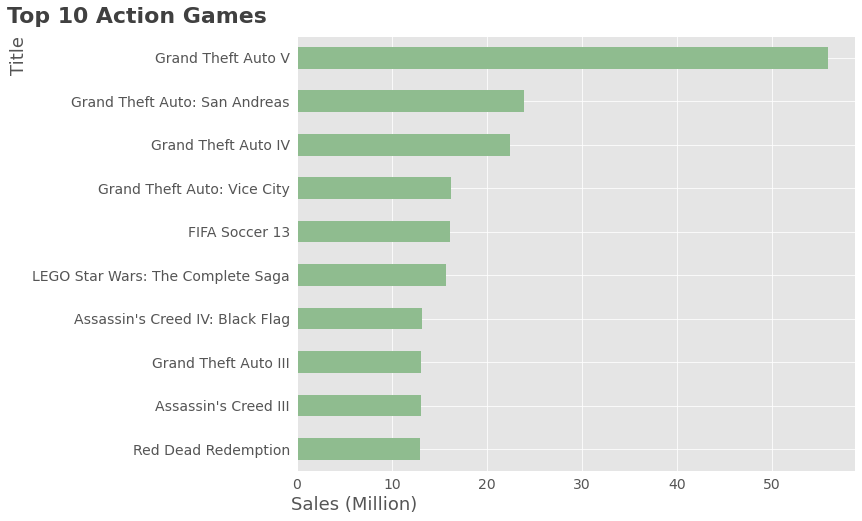

In [45]:
# Subset action games and sum up global sales
action = g[g["Genre"] == "Action"]
act = action.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot:: top 10 action games
plt.figure(figsize=(10, 8))
ax = act.head(10).plot.barh(color="darkseagreen")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Action Games",
    ha="left",
    va="center",
    x=-0.519,
    y=1.03,
    fontdict=font_title,
)

Among the action games *Grand Theft Auto V* is the clear winner, with over 50 million of sales; another interesting fact is that the most popular franchise is *Grand Theft Auto*, with 5 games in the top 10 of the action genre (and 4 of them in top 5).

Text(-0.519, 1.03, 'Top 10 Sports Games')

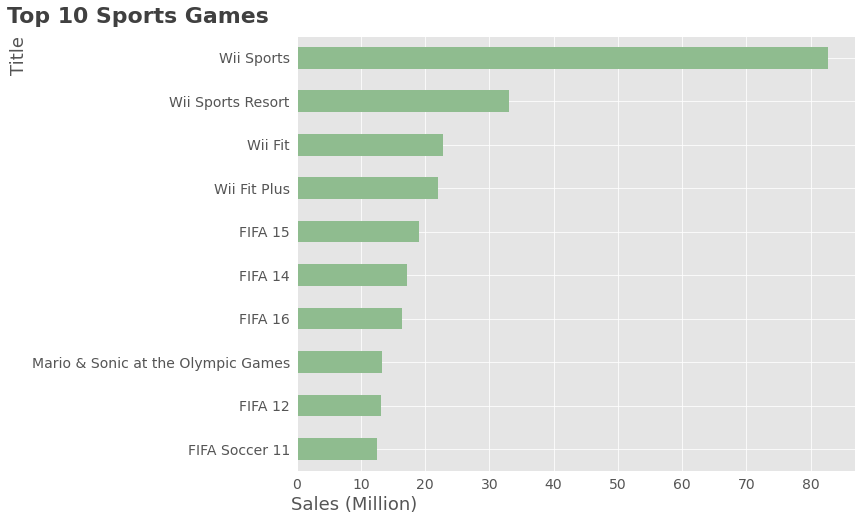

In [46]:
# Subset sports games and sum up global sales
sport = g[g["Genre"] == "Sports"]
spt = sport.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot:: top 10 sports games
plt.figure(figsize=(10, 8))
ax = spt.head(10).plot.barh(color="darkseagreen")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Sports Games",
    ha="left",
    va="center",
    x=-0.519,
    y=1.03,
    fontdict=font_title,
)

Among the sports games *Wii Sports* is the clear winner, with over 80 million sales, and it also represents the game with the highest sales in the video game history; in this genre, the most popular franchises are *FIFA* and *Wii*.

Text(-0.66, 1.03, 'Top 10 RPG Games')

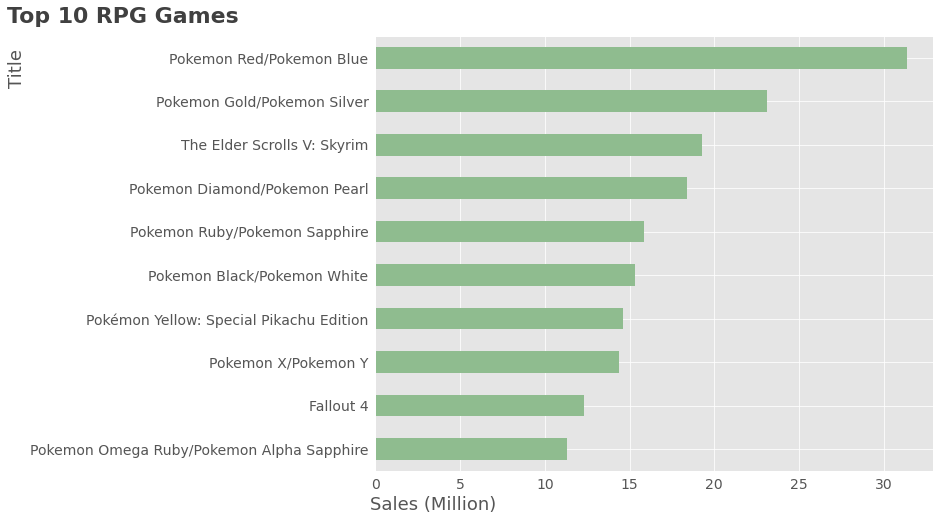

In [47]:
# Subset RPG games and sum up global sales
role = g[g["Genre"] == "Role-Playing"]
rl = role.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 RPG games
plt.figure(figsize=(10, 8))
ax = rl.head(10).plot.barh(color="darkseagreen")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=0.97)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 RPG Games",
    ha="left",
    va="center",
    x=-0.66,
    y=1.03,
    fontdict=font_title,
)

Among the role-playing games *Pokemon Red/Blue* is the clear winner and the franchise of Pokemon dominates this genre, with the exception of *Skyrim*.

We will finally draw a stacked bar plot to see the distribution of sales in genres on different markets.

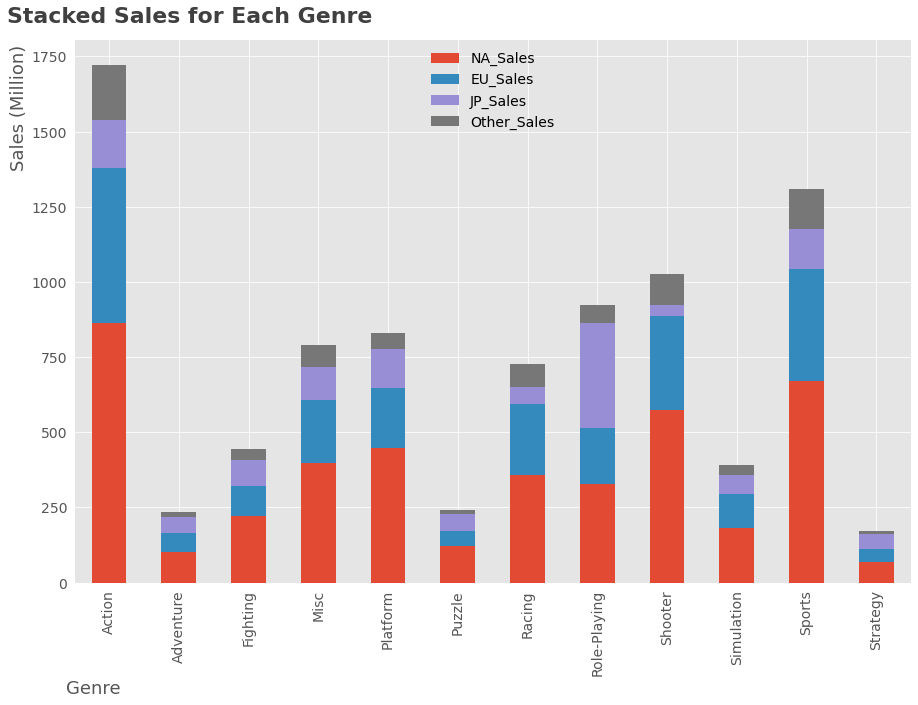

In [48]:
ax = comp_genre.plot.bar(stacked=True, figsize=(15, 10))

# Plot style
plot_style()

# x and y labels
plt.xlabel("Genre", ha="left", x=-0.01)
plt.ylabel("Sales (Million)", ha="right", y=0.99)

# Title
plt.title(
    "Stacked Sales for Each Genre",
    ha="left",
    va="center",
    x=-0.08,
    y=1.03,
    fontdict=font_title,
)

# Customize legend
ax.legend(loc="upper center", fontsize=14, frameon=False)

Conclusions:

With the stacked bar plot of genres among the four different markets we get a complete picture:

1. Actions and Sports are the two most popular genre globally on all the markets, except for Japan
2. In Japan the genre with the highest sales is RPG
2. The region with the highest sales is clearly America, followed by Europe

#### Genres Historical Development
Finally, let's see the evolution of game genres considering game sales. We won't use absolute numbers but percentages (of the genre by year) to have a better overview of the situation.

In [49]:
# Percentages of genre sales by year
year_genre = g.groupby(["Year", "Genre"]).agg({"Global_Sales": "sum"})
genre_perc = year_genre.groupby(level=0).apply(
    lambda x: round((100 * x / float(x.sum())), 2)
)

# Select first three years
genre_perc.loc[np.arange(1980, 1983)]

Global_Sales
Year   Genre                   
1980.0 Action              2.99
       Fighting            6.77
       Misc               23.81
       Shooter            62.13
       Sports              4.31
1981.0 Action             41.49
       Platform           19.37
       Puzzle              6.26
       Racing              1.34
       Shooter            28.07
       Simulation          1.26
       Sports              2.21
1982.0 Action             22.59
       Misc                3.01
       Platform           17.43
       Puzzle             34.75
       Racing              5.44
       Shooter            13.13
       Sports              3.64

The genre evolution is not very clear in the tabular form, therefore, let's visualize it.

Text(0.5, 1.02, 'Genres Historical Development')

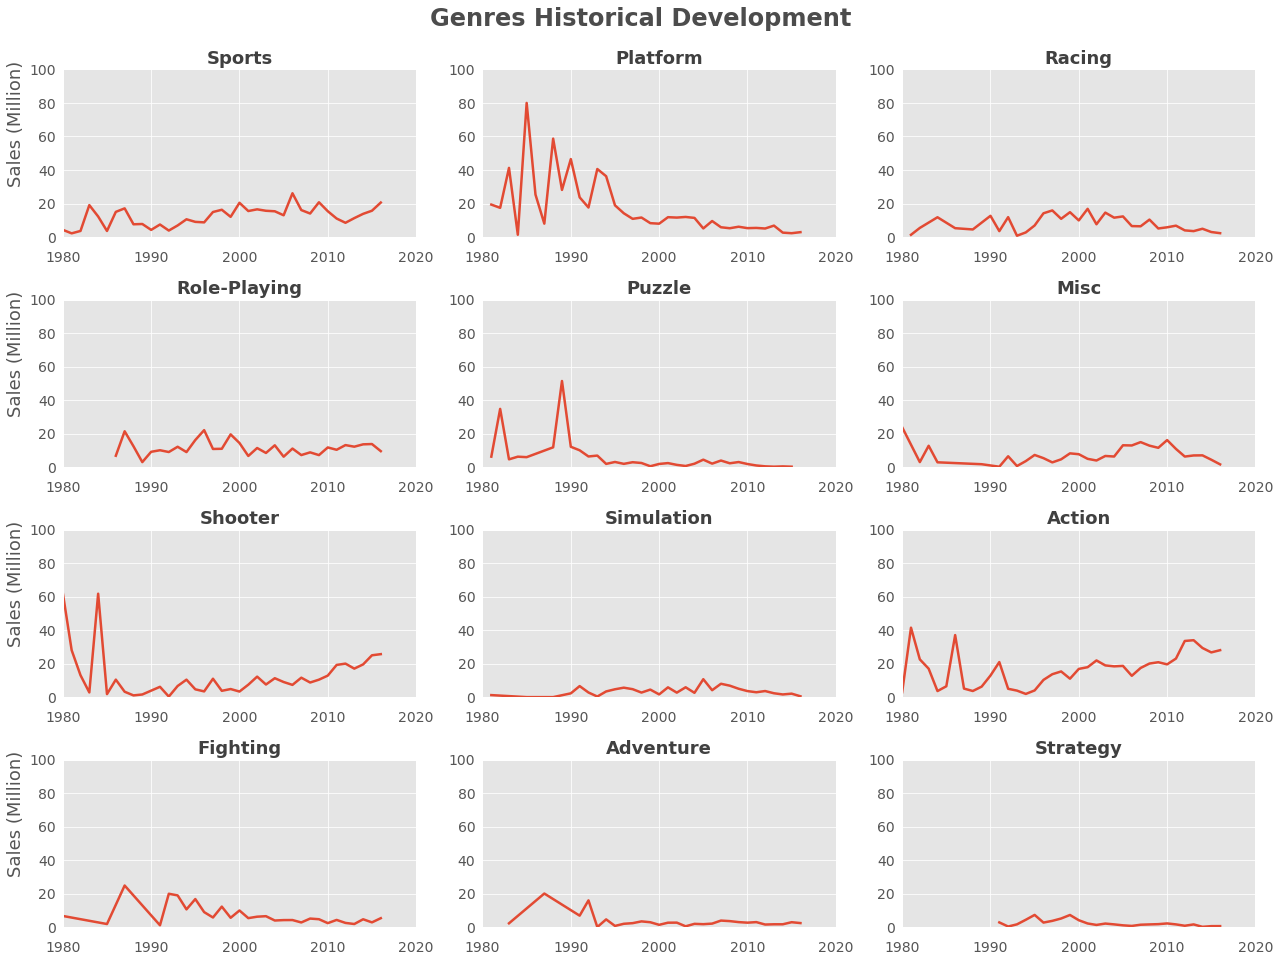

In [50]:
# Figure
fig = plt.figure(figsize=(18, 19))

# Reset index to remove the Multiindex
genre_perc.reset_index(inplace=True)

# All genres
genres = g["Genre"].unique()

# Create 12 subplots on the figure
for i in range(len(genres)):

    # Add 6x3 subplots
    ax = fig.add_subplot(6, 3, i + 1)

    # Select only one genre to plot
    df_genre = genre_perc[genre_perc["Genre"] == genres[i]]

    # Plot
    ax.plot(df_genre["Year"], df_genre["Global_Sales"], linewidth=2.5)

    # Set xticks
    ax.set_xticks(np.arange(1980, 2030, 10))

    # Add padding for x ticks
    ax.tick_params(axis="x", which="major", pad=10)

    # Set x limit between 1980 and 2020
    ax.set_xlim(1980, 2020)

    # Set y limit between 0 and 100%
    ax.set_ylim(0, 100)

    # Set titles
    ax.set_title(genres[i], fontdict={"size": 18, "alpha": 0.75, "weight": "bold"})

    # Plot style
    ax.tick_params(axis="both", labelsize=14, bottom=False, left=False)

    if i % 3 == 0:
        ax.set_ylabel(ylabel="Sales (Million)", size=18, ha="left", y=0.3)


# Add spacings between subplots
fig.tight_layout(pad=1.5)


# Main title
fig.suptitle(
    "Genres Historical Development",
    fontsize=24,
    alpha=0.7,
    fontweight="bold",
    y=1.02,
    x=0.5,
)

More or less all genres maintained the same popularity. However, there are some interesting insights:

* Platform games were much popular in the 1990s and their popularity started to decline at the end of the 20th century.
* There were two spikes of puzzle games popularity in 1982 (release of Pac-Man) and in 1989 (release of Tetris).

**NOTE**: in many cases, almost all games have their sales peaks at the release, hence these plots represent the real popularity of each genre. However, we cannot say for sure that some games from the 90s were still very popular in the 00s which could influence the conclusions (a notable example is Tetris which maintained its popularity for many years).

### What is the Most Successful Publisher?

Let's now focus our attention on video game publishers. There are many ways to measure the success of a company and one of them is revenue. However, this approach has [many flaws](https://gamerant.com/most-successful-game-publishers-2010s-revenue/) because some companies do not have clear revenue reports or merge all entertainment products so it is difficult to figure out what percentage of video games them has contributed to the revenue.

Nonetheless, we will sum up sales for each publisher to find out how successful they are.

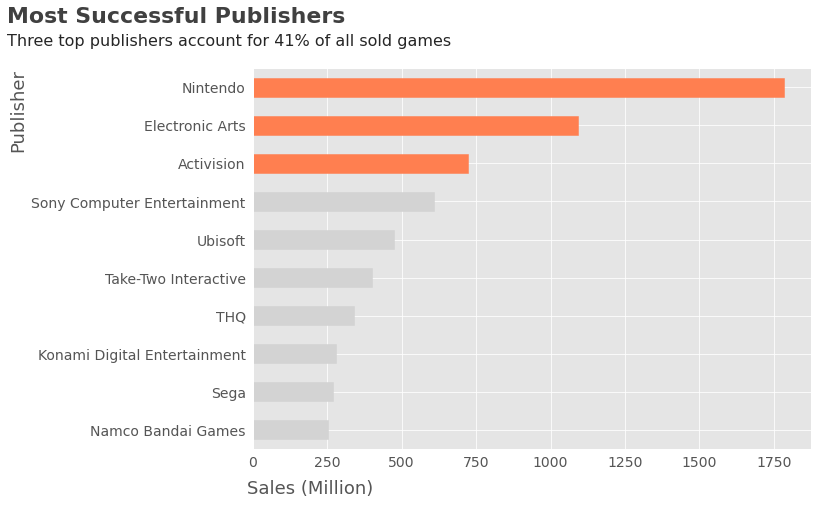

In [51]:
# Plot
fig, ax = plt.subplots(figsize=(10, 7))
g.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False).head(10).plot(
    kind="barh"
)

# Plot style
plot_style()

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Set, pad and align x and axis titles
ax.set_xlabel("Sales (Million)", labelpad=10, ha="left", x=-0.01)
ax.set_ylabel("Publisher", ha="right", y=1)

# Title
plt.text(
    x=-0.44,
    y=1.12,
    s="Most Successful Publishers",
    fontdict=font_title,
    transform=ax.transAxes,
)

# Subtitle
plt.text(
    x=-0.44,
    y=1.06,
    s="Three top publishers account for 41% of all sold games",
    fontdict=font_subtitle,
    transform=ax.transAxes,
)

# Color first three bars
for bar in ax.patches:
    if bar.get_width() > 650:
        bar.set_color("coral")
    else:
        bar.set_color("lightgray")

[Nintendo](https://en.wikipedia.org/wiki/Nintendo) dominates accumulating almost 2 billion sales and having almost 700 million sales more than its competitor, Electronic Arts.

It's also surprising to find out that these three publishers sold 41% of all video games in the history of this industry.

In [52]:
# % of sales for top 3 publishers
top_three_pub_perc = (
    g.groupby("Publisher")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
    .sum()
    / g["Global_Sales"].sum()
)

print(
    "Three top publishers sold {:.1%} of all video games in history.".format(
        top_three_pub_perc
    )
)

Three top publishers sold 40.8% of all video games in history.


Another possible proxy for the success is the number of released games since it is often associated with the number of video games companies that the publisher owns (and also the number of game franchises).

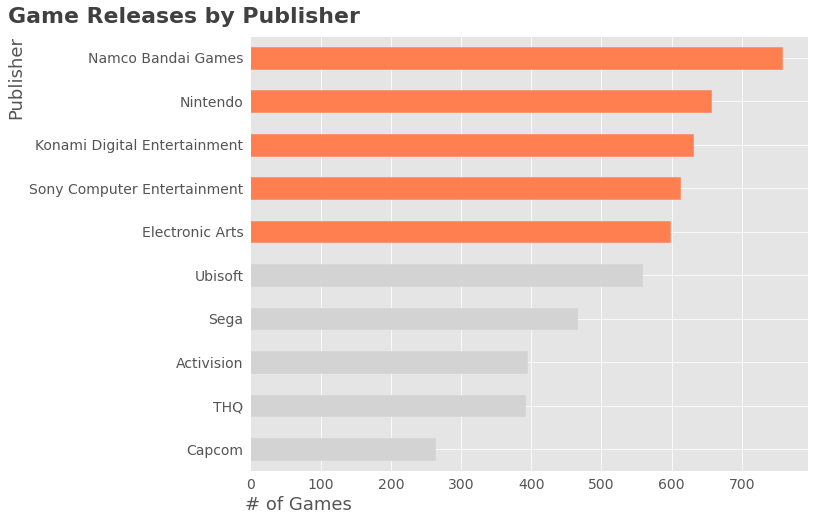

In [53]:
# Drop duplicates to correctly count the number of games per publisher
publisher_for_genre = g.drop_duplicates(subset="Name")
publisher_for_genre = (
    publisher_for_genre["Publisher"].value_counts().sort_values(ascending=False)
)

# Plot: released games by publisher
plt.figure(figsize=(10, 8))
ax = publisher_for_genre.head(10).plot.barh(color="coral")

# Plot style
plot_style()

# x and y labels
plt.xlabel("# of Games", ha="left", x=-0.01)
plt.ylabel("Publisher", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Game Releases by Publisher",
    ha="left",
    va="center",
    x=-0.435,
    y=1.03,
    fontdict=font_title,
)

# Color first five bars
for bar in ax.patches:
    if bar.get_width() > 570:
        bar.set_color("coral")
    else:
        bar.set_color("lightgray")

Interestingly, the publisher with the **highest number of released games is a Japanese publisher [Namco Bandai Entertainment](https://en.wikipedia.org/wiki/Bandai_Namco_Entertainment)** followed by Nintendo and Konami. In the top 5 publishers, 4 are Japanese.

1. The publisher with the highest sales is Nintendo and its main competitor is Electronic Arts
2. The situation is different if we look at the number of game releases: Namco Bandai Games which is only in the 10th position in the sales classification but becomes the 1st in the number of game releases. Nintendo is the first publisher by sales but the second in the number of games. EA, on the other hand, is the second in sales, but only fifth in the number of games
3. This fact can be only be explained by the great success of the EA games, which had more sales with fewer games

#### Top 10 Games of Top 3 Publishers

After we figure out what are the most successful publishers (by sales these are Nintendo, EA and Activision) it should be interesting to find out what were the games that contributed the most to their success hence we will visualize the sales of the top 10 games of each of these companies.

Text(-0.413, 1.03, 'Top 10 Nintendo Games')

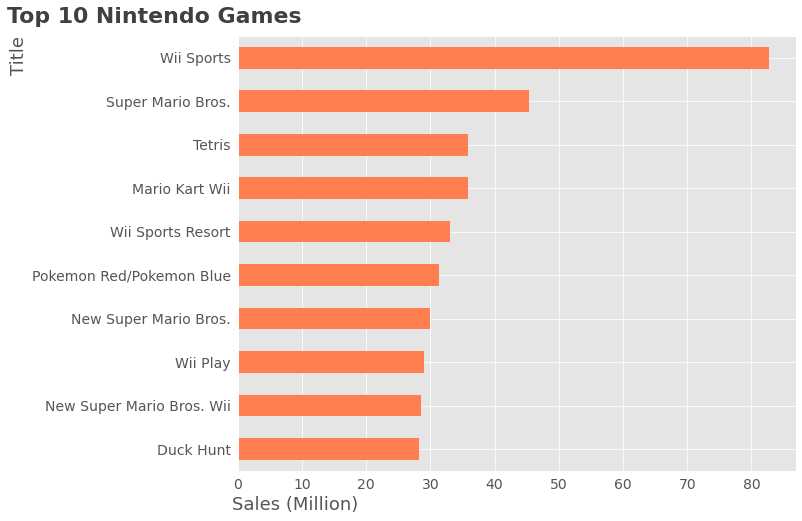

In [54]:
# Subset Nintendo and sum up their sales
nintendo = g[g["Publisher"] == "Nintendo"]
nin = nintendo.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 Nintendo games
plt.figure(figsize=(10, 8))
ax = nin.head(10).plot.barh(color="coral")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Nintendo Games",
    ha="left",
    va="center",
    x=-0.413,
    y=1.03,
    fontdict=font_title,
)

The most popular Nintendo game is by far *Wii Sports*, with over 80 million sales.

Text(-0.413, 1.03, 'Top 10 EA Games')

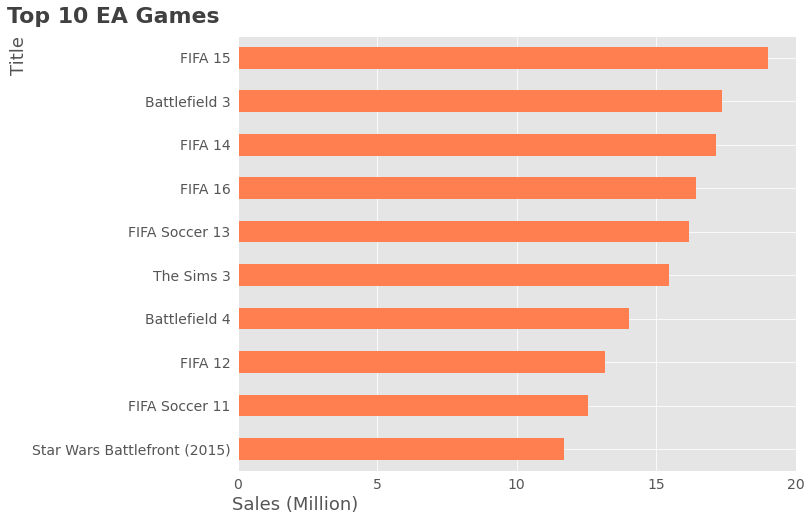

In [55]:
# Subset EA and sum up their sales
electronic_arts = g[g["Publisher"] == "Electronic Arts"]
el = electronic_arts.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 EA games
plt.figure(figsize=(10, 8))
ax = el.head(10).plot.barh(color="coral")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=1)

# Decrease x ticks frequancy
x_ticks = np.arange(0, 25, 5)
plt.xticks(x_ticks)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 EA Games",
    ha="left",
    va="center",
    x=-0.413,
    y=1.03,
    fontdict=font_title,
)

The most popular EA game is *FIFA 15* but, in this case, the competition with other games is stronger. And we can also say that the most successful EA franchise is *FIFA*.

Text(-0.455, 1.03, 'Top 10 Activison Games')

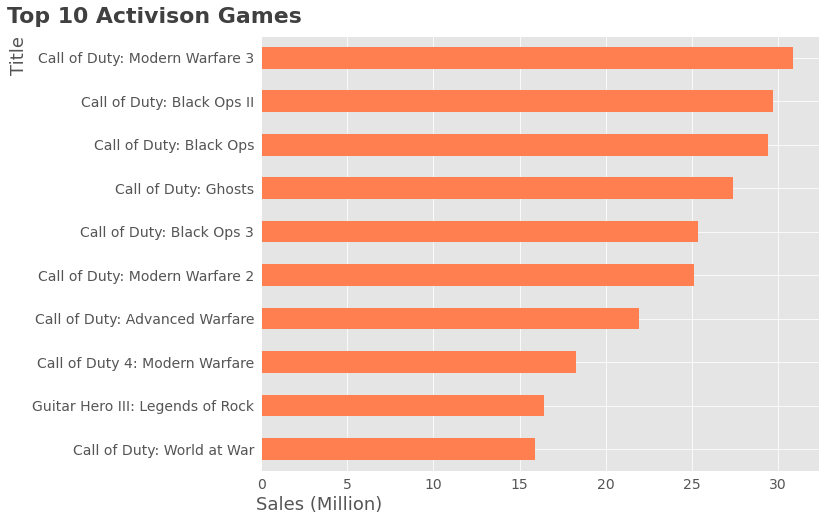

In [56]:
# Subset Activision and sum up their sales
activision = g[g["Publisher"] == "Activision"]
act = activision.groupby("Name")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 Activision games
plt.figure(figsize=(10, 8))
ax = act.head(10).plot.barh(color="coral")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Title", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Activison Games",
    ha="left",
    va="center",
    x=-0.455,
    y=1.03,
    fontdict=font_title,
)

The most popular Activision game is *Call of Duty: Modern Warfare 3* and also, in this case, the competition with other games stronger. The most popular franchise is by far *Call of Duty* which counts 9 games in the top 10 with the only exception of *Guitar Hero 3*.

Conclusions:
1. ***Wii Sports* had a staggering amount of sales**, being the most popular Nintendo game and the most successful game in the dataset
2. **The top 5 Nintendo games** (by sales) all **had more than 30 million sales**, while if we look at the first five games of the chart for both Electronic Arts and Activision they are all had less than 30 million (except for *Call of Duty: Modern Warfare 3*)
3. The previous trend confirms that probably Nintendo had the highest sales because, even if had fewer releases, their games gained more popularity 
4. Among the Electronic Arts games, the *FIFA* games are the most popular but in the second place we see *Battlefield 3*
5. *Call of Duty: Modern Warfare 3* can be considered a true classic shooter, such that it has even more sales than its successors

#### Historical Development of Publishers
Finally, we will look at the historical development of the top 10 publishers (by sales) and we will also split the analysis into "before and after 2000" as we did for platforms.

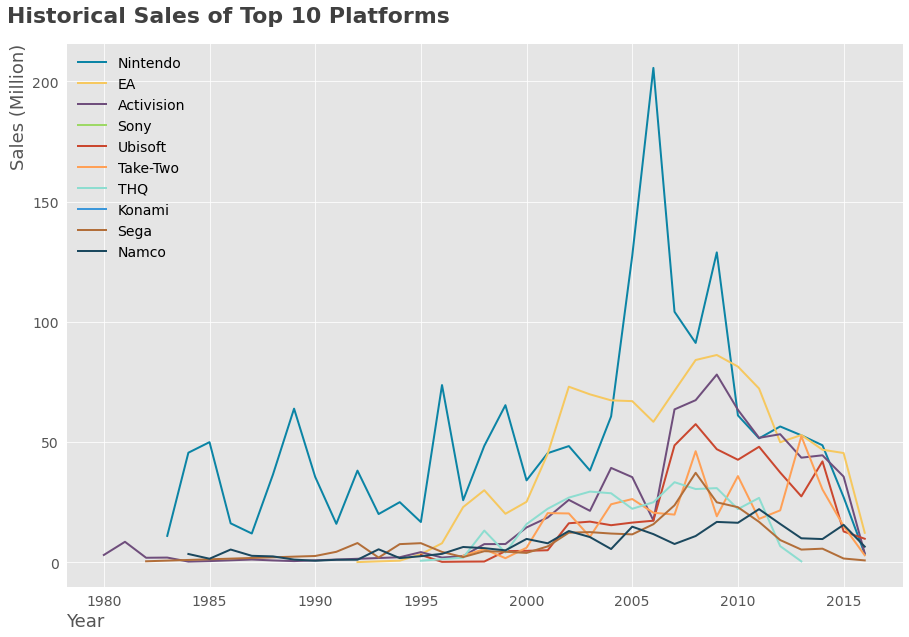

In [57]:
# Subset the remaining top 10 publishers
sony = g[g["Publisher"] == "Sony Computer Enterainment"]
ubisoft = g[g["Publisher"] == "Ubisoft"]
take_two = g[g["Publisher"] == "Take-Two Interactive"]
thq = g[g["Publisher"] == "THQ"]
konami = g[g["Publisher"] == "Konami Digital Enterainment"]
sega = g[g["Publisher"] == "Sega"]
namco = g[g["Publisher"] == "Namco Bandai Games"]

# Plot
plt.figure(figsize=(15, 10))
y1 = nintendo.groupby("Year")["Global_Sales"].sum()
y2 = electronic_arts.groupby("Year")["Global_Sales"].sum()
y3 = activision.groupby("Year")["Global_Sales"].sum()
y4 = sony.groupby("Year")["Global_Sales"].sum()
y5 = ubisoft.groupby("Year")["Global_Sales"].sum()
y6 = take_two.groupby("Year")["Global_Sales"].sum()
y7 = thq.groupby("Year")["Global_Sales"].sum()
y8 = konami.groupby("Year")["Global_Sales"].sum()
y9 = sega.groupby("Year")["Global_Sales"].sum()
y10 = namco.groupby("Year")["Global_Sales"].sum()

plt.plot(y1, label="Nintendo", color="#0B84A5", linewidth=2)
plt.plot(y2, label="EA", color="#F6C85F", linewidth=2)
plt.plot(y3, label="Activision", color="#6F4E7C", linewidth=2)
plt.plot(y4, label="Sony", color="#9DD866", linewidth=2)
plt.plot(y5, label="Ubisoft", color="#CA472F", linewidth=2)
plt.plot(y6, label="Take-Two", color="#FFA056", linewidth=2)
plt.plot(y7, label="THQ", color="#8DDDD0", linewidth=2)
plt.plot(y8, label="Konami", color="#3C97DA", linewidth=2)
plt.plot(y9, label="Sega", color="#B26E39", linewidth=2)
plt.plot(y10, label="Namco", color="#1B485E", linewidth=2)

# Plot style
plot_style()

# x and y labels
plt.xlabel("Year", ha="left", x=0)
plt.ylabel("Sales (Million)", ha="right", y=1)

# Title
plt.title(
    "Historical Sales of Top 10 Platforms", ha="left", x=-0.07, va="bottom", y=1.02, fontdict=font_title
)

# Customize the legend
plt.legend(loc="upper left", fontsize=14, frameon=False)

In [58]:
# Nintendo sales in 2004-2006 (peak for the publihser)
peak_nintendo = g.loc[
    (g["Publisher"] == "Nintendo") & (g["Year"] >= 2004) & (g["Year"] <= 2006)
]

print(
    f"Nintendo had {peak_nintendo['Global_Sales'].sum()} million sales at its peak in 2004-2006."
)

Nintendo had 393.73 million sales at its peak in 2004-2006.


Conclusions:

1. **Nintendo was in the market for a long time**, more than 30 years, and always had higher sales than its competitors: it's the king between publishers
2. **A general increase in the sales started in 1995** and became more consistent in 2000 reaching the peak around 2010
3. **The main competitor of Nintendo is Electronic Arts**, which in nearly 20 years had comparable to Nintendo number of sales
4. Nintendo had an incredible amount of sales between 2004 and 2006, nearly **400 million sales** in just three years, probably thanks to the release of two very successful platforms, Nintendo DS and Wii

#### Sales by Publisher Before and After 2000

Finally, let's split the dataset into two time periods (before and after 2000) to see how the market changed.

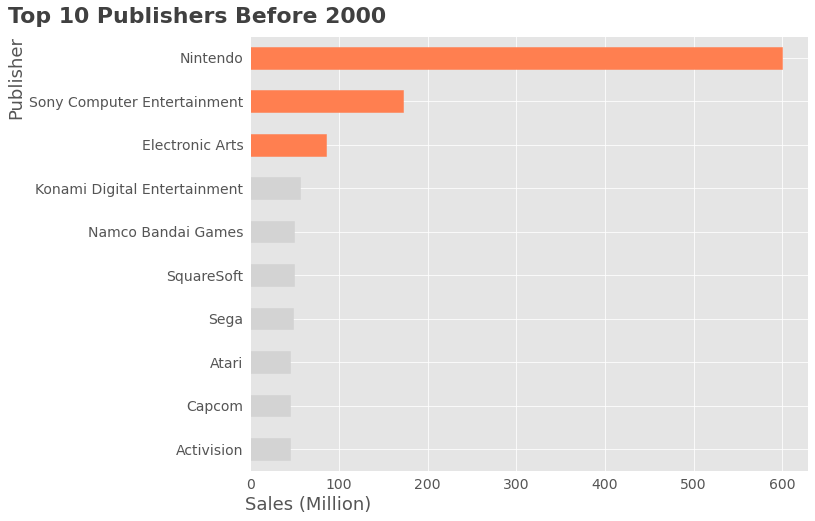

In [59]:
# Subset before 2000 and sum up sales by publisher
bef = g[(g["Year"] < 2000)]
bef = bef.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 publishers before 2000
plt.figure(figsize=(10, 8))
ax = bef.head(10).plot.barh()

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Publisher", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Publishers Before 2000",
    ha="left",
    va="center",
    x=-0.435,
    y=1.03,
    fontdict=font_title,
)

# Color the first three bars
for bar in ax.patches:
    if bar.get_width() > 80:
        bar.set_color("coral")
    else:
        bar.set_color("lightgray")

Before 2000, the publisher with the highest sales is, without a doubt, Nintendo which has nearly 600 million sales, followed by Sony Computer Entertainment and Electronic Arts.

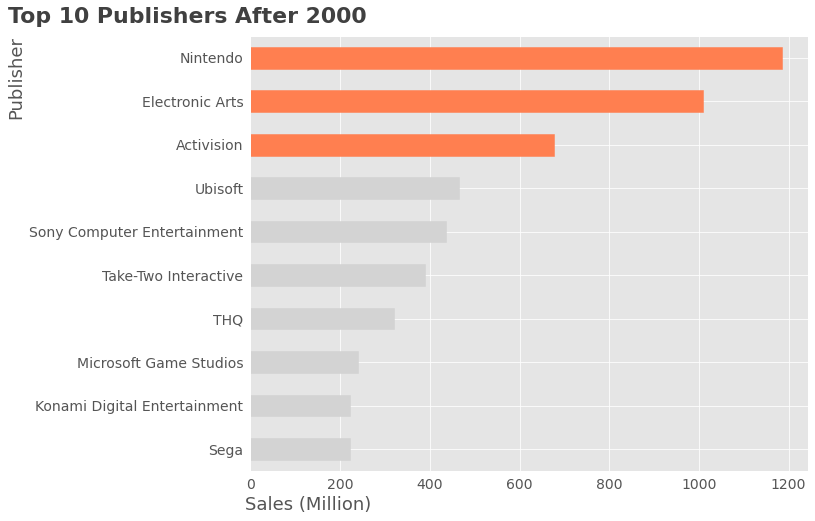

In [60]:
# Subset after 2000 and sum up sales by publisher
aft = g[(g["Year"] >= 2000)]
aft = aft.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)

# Plot: top 10 publhsers after 2000
plt.figure(figsize=(10, 8))
ax = aft.head(10).plot.barh(color="coral")

# Plot style
plot_style()

# x and y labels
plt.xlabel("Sales (Million)", ha="left", x=-0.01)
plt.ylabel("Publisher", ha="right", y=1)

# Invert y axis so that the widest bars are on top
ax.invert_yaxis()

# Title
plt.title(
    "Top 10 Publishers After 2000",
    ha="left",
    va="center",
    x=-0.435,
    y=1.03,
    fontdict=font_title,
)

# Color the firts three bars
for bar in ax.patches:
    if bar.get_width() > 600:
        bar.set_color("coral")
    else:
        bar.set_color("lightgray")

After 2000, Nintendo is still the "king of sales" having nearly 1.2 billion sales but its rivals are now more competitive.

Conclusions:

1. Before 2000, **Nintendo was the undiscussed king among publishers**
2. After 2000, the situation is different, with Nintendo still on the top of the sales chart, but its rivals became more competitive especially Electronic Arts
3. In general, we notice an increase in sales for all publishers after 2000
4. An interesting detail is that Nintendo has duplicated its global sales in 15 years, passing from almost 600 million before 2000 to over 1.2 billion after 2000
5. Following this way of thinking, if we look at the data of Electronic Arts we see how it managed to duplicate its sales between 2000 and 2015, passing from almost 100 million to nearly billion sales
6. How many years the hegemony of Nintendo will last? It appears that there is a new king in the global market

### What Are the Most Successful Franchises?

In this section, we will look closely at game franchises. In particular, we will figure out:

* The most popular franchises in history
* Evolution of game franchises and their impact on different genres

To answer these questions we will use a dataset that was made with web-scraping of the [list of video game franchises](https://en.wikipedia.org/wiki/List_of_video_game_franchises) on Wikipedia.

Note that the Mario game series is split into many "sub-series" like Mario Kart, Super Mario and so on. We will analyze these subseries separately. Also, there are some Wii games that were made for a game series but here are labeled as Wii.

In [61]:
# Array of franchises
franchises = pd.read_csv("./data/game_titles.csv").iloc[:, -1].values

# Pokemon in dataset has an accent on e which we have
# to correct to successfully label franchises
franchises[511] = "Pokemon"

# There are also some game series: X, N, and D that are not very popular
# cause errors in labeling because some games contain one of these capital
# letters
delete = [158, 451, 761, 762]
franchises = np.delete(franchises, delete)

# Label franchises
g = g.copy()
for franch in franchises:
    g.loc[g["Name"].str.contains(franch), "franchise"] = franch

Let's look at the most popular franchises in video game history.

Text(-62, 4.8, 'Most Successful Video Game Franchises')

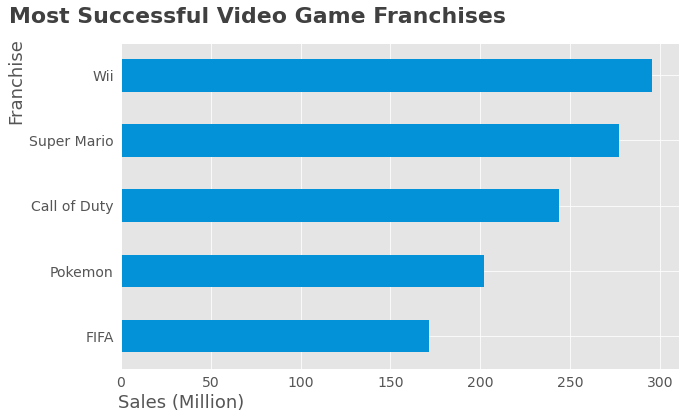

In [62]:
# Plot of the most successful franchises in history
top_five_franch = g.groupby("franchise")["Global_Sales"].sum().sort_values().tail()
ax = top_five_franch.plot(kind="barh", figsize=(10, 6), color="#0392D8")

# Set plot style
plot_style()

# x and y labels
ax.set_xlabel("Sales (Million)", ha="left", x=-0.005)
ax.set_ylabel("Franchise", ha="left", y=0.75)

# Title
ax.text(x=-62, y=4.8, s="Most Successful Video Game Franchises", fontdict=font_title)

The winner is the [Wii game series](https://en.wikipedia.org/wiki/Wii_(video_game_series) owned by Nintendo. It is also curious that out of the five most successful game franchises three are owned by the Japanese publisher Nintendo.

Let's have a look at how these franchises historically developed.

Text(1981.1, 121, 'Franchise Historical Development')

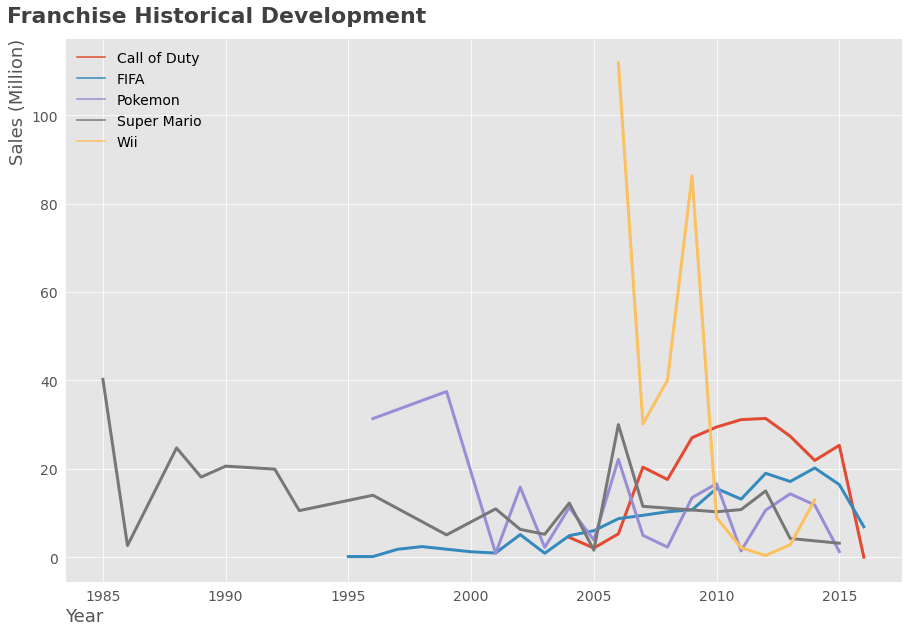

In [63]:
# Only top 5 franchises
subset = g[g["franchise"].isin(top_five_franch.index)]

# Prepare the data for plotting
melted = (
    subset.pivot_table(
        index="franchise", columns="Year", values="Global_Sales", aggfunc=sum
    )
    .reset_index()
    .melt(id_vars="franchise")
)

# Plot
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.lineplot(x="Year", y="value", hue="franchise", data=melted, linewidth=3)

# Set plot style
plot_style()

# Set and align x and y axis titles
ax.set_xlabel("Year", ha="left", x=0)
ax.set_ylabel("Sales (Million)", ha="right", y=1)

# Legend style
ax.legend(loc="upper left", frameon=False, fontsize=14)

# Title
ax.text(s="Franchise Historical Development", x=1981.1, y=121, fontdict=font_title)

Text(0.28, 0.91, 'Franchise Historical Development')

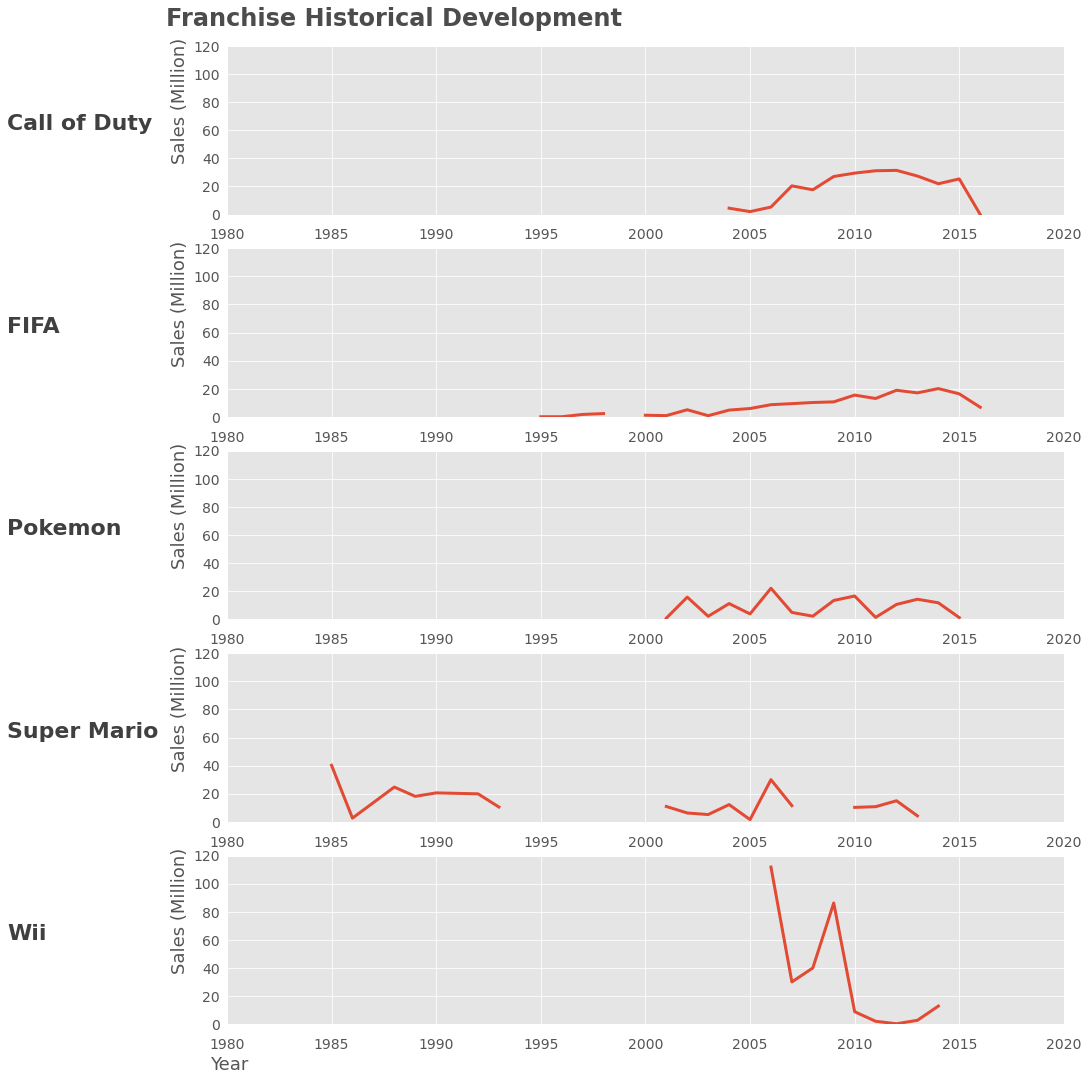

In [64]:
# Plot figure
fig = plt.figure(figsize=(15, 18))

# Extract franchise names to use on the plot
names = melted["franchise"].unique()

# Plot
for fr in range(len(names)):
    ax = fig.add_subplot(5, 1, fr + 1)
    ax.plot(
        melted[melted["franchise"] == names[fr]]["Year"],
        melted[melted["franchise"] == names[fr]]["value"],
        linewidth=3,
    )

    # Limits
    ax.set_ylim(0, 120)
    ax.set_xlim(1980, 2020)

    # Tick params
    plt.tick_params(axis="x", which="both", pad=10)

    # Plot style
    plot_style()

    # Add x label to the bottom plot
    if fr == 4:
        ax.set_xlabel("Year", ha="left", x=-0.02)

    # Add y label
    ax.set_ylabel("Sales (Million)", ha="left", y=0.3)

    # Title
    ax.text(s=names[fr], x=1969.5, y=60, fontdict=font_title)

# Main title
fig.suptitle(
    "Franchise Historical Development",
    fontsize=24,
    alpha=0.7,
    fontweight="bold",
    x=0.28,
    y=0.91,
)

The *Call of Duty* and *FIFA* game franchises had a stable growth over the years while, the *Pokemon*, *Super Mario* and *Wii* franchises had big increases and decreases in sales. It is also interesting that **the *Super Mario* franchise had a long pause between 1993 and 2002** as confirmed by [Wikipedia](https://en.wikipedia.org/wiki/Super_Mario#Super_Mario_Maker_games): there were no releases of the *Super Mario* games in those years.

## Conclusions

Wrapping up, in our project we were able to tell the history of video games, analyzing their sales, genres, platforms and publishers. In particular, we decided to split our work into four sub-sections (year, genre, platform, publisher) and for each one, we carried out some standard analysis, such as:

- the year/genre/platform/publisher with the highest global sales
- the year/genre/platform/publisher with the highest number of game releases
- the year/genre/platform/publisher historical development

Then, we add some specific analysis in order to catch some aspect of the data, for example inspecting the sales on the different market for every genre or the games with the highest sales in every genre of for the most successful publishers. We also zoomed in some cases, comparing, for example, PlayStation and Xbox or finding out what are the most successful titles of the top 3 publishers.

We also had an idea: why not try to compare game franchises? Usually, in the video game market, if a title has great the publisher tries to build a franchise on it, releasing a new generation of the games every few years. In the history of video games, this happened both in early and recent times, just take a look at *Super Mario* and *FIFA*, which titles were released in different periods from 1980 to 2016. Thus, we decided to find out which is the best-selling franchise, creating a dataset using web scraping of the list of video game franchises on [Wikipedia](https://en.wikipedia.org/wiki/List_of_video_game_franchises).

To conclude, we present the most important results of the analysis.

**Years**:
- **2008 was the most successful year in video game history**, accumulating almost 700 million sales worldwide
- almost 32% of the video games in the database were released between 2007 and 2010
- there was a quick and consistent increase in sales after 1995
- the sales in North America and Europe exceed by far the sales in Japan and the rest of the world

**Platforms**:
- **the platform with the highest sales is PlayStation 2**, with over 1.2 billion sales
- the platform with the highest number of released games is the Nintendo DS but PlayStation 2 is very close
- the most successful portable platform is Nintendo DS
- PlayStation is a much more popular platform than Xbox
- the most successful platform before 2000 is PlayStation, while after 2000 is PlayStation 2; both platforms are owned by Sony
- there was an increase in sales for different platforms after 2000, thanks to the release of new accessible platforms such as PlayStation, Xbox, Nintendo DS and Nintendo Wii

**Genres**:
- **the genre with the highest sales is Action**, with almost two billion sales
- the genre with the highest number of released games is still Action
- among the different market, the genre with the highest success is Action followed by Sports, except for the Japanese market, where the most popular genre is RPG

**Publishers**:
- the publisher which has **the highest sales is Nintendo**, with almost two billion sales
- the publisher which has **the largest number of released games is Namco Bandai Entertainment**
- there was an increase in sales for publishers after 2000, thanks to the previously stated increase of new accesible platform
- Nintendo was the "king of sales" both before and after 2000

**Franchises**:
- **the most succesful franchise is Wii**, with nearly 300 million sales
- this success  from Wii is mainly due to the enormous amount of sales of *Wii Sports*, with over 80 million sales

This was the video game history, from their early days until modern times. However, the videogames industry is strongly correlated with the evolution of technology, it is a "world" in constant development. In the last years, we observed a drop in video game sales, mainly due to the lack of innovation, but in the upcoming years, this may change. For example, the birth of virtual reality will surely impact video games and maybe will result in a new explosion of sales that we saw in the early 2000.